# Описание проекта

Нам необходимо провести анализ данных клиентов банка "Метанпроф" для отдела маркетинга с целью сегментации пользователей и определения основных причин оттока клиентов. Заказчик хочет переработать продуктовую линейку банка с целью удержать отточных клиентов и привлечь новых.

По итогам исследования необбходимо подготовить презентацию в формате pdf для демонстрации ее заказчику.

# Описание данных

/datasets/bank_scrooge.csv

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- USERID — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — количество баллов собственности
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент,
- EST_SALARY — оценочный доход клиента,
- сhurn — признак оттока.

# Декомпозиция

1. Обзор и предобработка данных:
    
    1.1. Проверка типов данных и переименование столбцов
    
    1.2. Проверка пропусков и дубликатов
    
    1.3. Анализ дубликатов и пропусков, определение природы пропусков и их исправление в случае необходимости
    
    1.4. Кодирование категориальных признаков (пол, город) для дальнейшего проведения корреляционного анализа


2. Исследовательский анализ данных:
    
    2.1. Корреляционный анализ данных
    
    2.2. Распределение клиентов
    
    2.3. Определение относительных значений по категориям и сегментация пользователей
    
    2.4. Исследование оттока в разрезе признаков 
    
3. Проверка статистических гипотез:

    3.1. Формирование выборок для проведения анализа

    3.2. Выбор статистического теста и обоснование данного выбора

    3.3. Проверка гипотез:

        Гипотеза №1 о различии возраста между клиентами, которые пользуются двумя продуктами банка и одним:

        - H0: возраст клиентов, которые пользуются двумя продуктами банков, одинаков с возрастом клиентов, которые пользуются одним продуктом
        - H1: возраст клиентов, которые пользуются двумя продуктами банков, отличается от возраста клиентов, которые пользуются одним продуктом

        Гипотеза №2 о влиянии активности клиента на отток:

        - H0: наличие активности пользователей влияет на показатель отточности и является статистически значимым
        - H1: наличие активности пользователей не влияет на показатель отточности и не является статистически значимым

4. Промежуточные итоги и выделение показателей, которые влияют на отточность

5. Сегментация на основе выделенных показателей

    5.1. Анализ доли оттока в разрезе выделенных сегментов
    
    5.2. Формирование портрета рискового клиента
    
    5.3. Формирование портрета лояльного клиента
    
6. Выводы и рекомендации для заказчика:

    6.1. Выводы и рекомендации для заказчика на основании проведенного анализа в письменном виде

    6.2. Ссылки на презентацию и дашборд

## 1. Обзор и предобработка данных

In [1]:
#импорт библиотек

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings; warnings.filterwarnings(action = 'ignore') 
import plotly.express as px

from plotly import graph_objects as go
from IPython.display import set_matplotlib_formats
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [2]:
# снимаем ограничение на количество столбцов
pd.set_option('display.max_columns', None)

# игнорируем предупреждения
#pd.set_option('chained_assignment', None) 

In [3]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [4]:
data.head()

USERID  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1

Приведем наименование столбцов к общему регистру и заменим некоторые наименования на более удобные

In [5]:
data.columns = data.columns.str.lower()
data = data.rename(columns={'userid' : 'user_id'})
data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

Проверим наличие дубликатов

In [6]:
data.duplicated().sum()

0

In [7]:
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [8]:
data['gender'].unique()

array(['Ж', 'М'], dtype=object)

Видим, что явные полные дубликаты и неявные в столбцах с наименованием городов и полом отсутствуют.

Преобразуем столбцы с городами и полом в код

In [9]:
data_copy = data.copy()
data = pd.get_dummies(data, columns=['gender', 'city']) 
data['city'] = data_copy['city'] 
data['gender'] = data_copy['gender']
data.head()

user_id  score   age  equity     balance  products  credit_card  \
0   183012  850.0  25.0       1    59214.82         2            0   
1   146556  861.0  37.0       5   850594.33         3            1   
2   120722  892.0  30.0       0         NaN         1            1   
3   225363  866.0  51.0       5  1524746.26         2            0   
4   157978  730.0  34.0       5      174.00         1            1   

   last_activity  est_salary  churn  gender_Ж  gender_М  city_Ростов  \
0              1    75719.14      1         1         0            0   
1              0    86621.77      0         1         0            0   
2              1   107683.34      0         1         0            0   
3              1   174423.53      1         1         0            0   
4              0    67353.16      1         0         1            0   

   city_Рыбинск  city_Ярославль       city gender  
0             1               0    Рыбинск      Ж  
1             1               0    Рыбинск      Ж  
2             1               0    Рыбинск      Ж  
3             0               1  Ярославль      Ж  
4             0               1  Ярославль      М

Проверим пропуски и типы данных

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         10000 non-null  int64  
 1   score           10000 non-null  float64
 2   age             9974 non-null   float64
 3   equity          10000 non-null  int64  
 4   balance         7705 non-null   float64
 5   products        10000 non-null  int64  
 6   credit_card     10000 non-null  int64  
 7   last_activity   10000 non-null  int64  
 8   est_salary      10000 non-null  float64
 9   churn           10000 non-null  int64  
 10  gender_Ж        10000 non-null  uint8  
 11  gender_М        10000 non-null  uint8  
 12  city_Ростов     10000 non-null  uint8  
 13  city_Рыбинск    10000 non-null  uint8  
 14  city_Ярославль  10000 non-null  uint8  
 15  city            10000 non-null  object 
 16  gender          10000 non-null  object 
dtypes: float64(4), int64(6), object(

Видим, что типы данных определены корректно.

Имеются пропуски в колонках с информацией о возрасте и о балансе.

Предположительно данная информация может отсутствовать по причине незаполнения ее пользователями.

Пропуски в значениях возраста составляют 0,26%, их можно удалить, на анализе это не отразится.

In [11]:
data = data.dropna(subset=['age'])

Исследуем пропуски в столбце balance, сформируем таблицу с пропусками в данном столбце для дальнейшего анализа

In [12]:
without_balance = data[data['balance'].isnull()]
without_balance

user_id  score   age  equity  balance  products  credit_card  \
2      120722  892.0  30.0       0      NaN         1            1   
9      133130  906.0  67.0       0      NaN         1            0   
10     148929  927.0  52.0       0      NaN         1            1   
11     172184  921.0  41.0       0      NaN         1            1   
19     127034  922.0  53.0       0      NaN         1            0   
...       ...    ...   ...     ...      ...       ...          ...   
9976   208085  876.0  38.0       0      NaN         1            0   
9984   125941  729.0  42.0       0      NaN         1            1   
9993   219924  884.0  36.0       0      NaN         1            1   
9996   139170  894.0  46.0       0      NaN         1            1   
9997   115639  903.0  24.0       0      NaN         2            1   

      last_activity  est_salary  churn  gender_Ж  gender_М  city_Ростов  \
2                 1   107683.34      0         1         0            0   
9                 1   238055.53      0         1         0            0   
10                1   196820.07      0         0         1            1   
11                1   217469.48      0         0         1            1   
19                0   147094.82      0         1         0            0   
...             ...         ...    ...       ...       ...          ...   
9976              0   171763.69      0         0         1            1   
9984              1   687538.70      0         1         0            0   
9993              1   169844.88      0         1         0            0   
9996              0   196898.29      0         0         1            0   
9997              1   108905.09      0         0         1            0   

      city_Рыбинск  city_Ярославль       city gender  
2                1               0    Рыбинск      Ж  
9                0               1  Ярославль      Ж  
10               0               0     Ростов      М  
11               0               0     Ростов      М  
19               1               0    Рыбинск      Ж  
...            ...             ...        ...    ...  
9976             0               0     Ростов      М  
9984             0               1  Ярославль      Ж  
9993             1               0    Рыбинск      Ж  
9996             0               1  Ярославль      М  
9997             0               1  Ярославль      М  

[2279 rows x 17 columns]

In [13]:
without_balance.describe().T

count           mean            std        min         25%  \
user_id         2279.0  171904.885915   33303.215270  114182.00  142992.500   
score           2279.0     865.357174      89.553735     642.00     871.000   
age             2279.0      42.093023      11.941551      18.00      33.000   
equity          2279.0       0.051338       0.226623       0.00       0.000   
balance            0.0            NaN            NaN        NaN         NaN   
products        2279.0       1.163229       0.403713       0.00       1.000   
credit_card     2279.0       0.815270       0.388164       0.00       1.000   
last_activity   2279.0       0.548925       0.497710       0.00       0.000   
est_salary      2279.0  226345.417464  199825.591443   20274.03  120217.385   
churn           2279.0       0.005704       0.075327       0.00       0.000   
gender_Ж        2279.0       0.441860       0.496717       0.00       0.000   
gender_М        2279.0       0.558140       0.496717       0.00       0.000   
city_Ростов     2279.0       0.103115       0.304176       0.00       0.000   
city_Рыбинск    2279.0       0.257130       0.437148       0.00       0.000   
city_Ярославль  2279.0       0.639754       0.480177       0.00       0.000   

                      50%         75%         max  
user_id         172304.00  201257.000   229145.00  
score              903.00     922.000      990.00  
age                 40.00      49.000       86.00  
equity               0.00       0.000        3.00  
balance               NaN         NaN         NaN  
products             1.00       1.000        3.00  
credit_card          1.00       1.000        1.00  
last_activity        1.00       1.000        1.00  
est_salary      174347.87  240372.775  1333687.36  
churn                0.00       0.000        1.00  
gender_Ж             0.00       1.000        1.00  
gender_М             1.00       1.000        1.00  
city_Ростов          0.00       0.000        1.00  
city_Рыбинск         0.00       1.000        1.00  
city_Ярославль       1.00       1.000        1.00

In [14]:
data[data['balance'].notnull()].describe().T

count           mean           std      min         25%  \
user_id         7695.0  171710.892268  3.381286e+04  94561.0  142638.000   
score           7695.0     843.744120  5.534254e+01    689.0     801.000   
age             7695.0      42.924366  1.224401e+01     18.0      33.000   
equity          7695.0       3.394802  1.584817e+00      0.0       2.000   
balance         7695.0  827245.587515  1.980327e+06      0.0  295698.715   
products        7695.0       2.081222  7.574461e-01      1.0       2.000   
credit_card     7695.0       0.640156  4.799857e-01      0.0       0.000   
last_activity   7695.0       0.515140  4.998032e-01      0.0       0.000   
est_salary      7695.0  124520.394264  1.046671e+05   2546.3   67556.980   
churn           7695.0       0.234698  4.238374e-01      0.0       0.000   
gender_Ж        7695.0       0.516699  4.997535e-01      0.0       0.000   
gender_М        7695.0       0.483301  4.997535e-01      0.0       0.000   
city_Ростов     7695.0       0.153476  3.604694e-01      0.0       0.000   
city_Рыбинск    7695.0       0.272515  4.452821e-01      0.0       0.000   
city_Ярославль  7695.0       0.574009  4.945245e-01      0.0       0.000   

                      50%         75%           max  
user_id         172710.00  201145.500  2.291360e+05  
score              840.00     882.000  1.000000e+03  
age                 40.00      52.000  8.600000e+01  
equity               4.00       5.000  9.000000e+00  
balance         524295.33  980051.215  1.191136e+08  
products             2.00       2.000  5.000000e+00  
credit_card          1.00       1.000  1.000000e+00  
last_activity        1.00       1.000  1.000000e+00  
est_salary      106250.18  155144.600  1.395064e+06  
churn                0.00       0.000  1.000000e+00  
gender_Ж             1.00       1.000  1.000000e+00  
gender_М             0.00       1.000  1.000000e+00  
city_Ростов          0.00       0.000  1.000000e+00  
city_Рыбинск         0.00       1.000  1.000000e+00  
city_Ярославль       1.00       1.000  1.000000e+00

При сравнении информации по двум таблицам - с заполненным балансом клиента и с пропущенным значением в данной колонке - видим, что какие-либо аномалии в таблице с незаполненным балансом отсутствуют.

Дополнительно проверим категориальные значения.

In [15]:
without_balance['products'].unique()

array([1, 2, 3, 0])

In [16]:
without_balance['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

Видим, что среди клиентов с пропущенным значением баланса отсутствуют клиенты с количеством продуктов 4 и 5, но не можем это отнести к аномалии или причине пропусков.

Также видим, что есть аномальные значения - клиенты с количеством продуктов 0.

Их рассмотрим далее отдельно.

По итогам проверки пропусков можем предположить, что пропуски в колонке balance относятся к категории MNAR, и мы не можем их отбросить или заполнить каким-либо одним или медианным значением, т.к. это может привести к искажению результатов анализа.

В связи с этим пропуски лучше оставить, т.к. их удаление приведет к тому, что мы отбросим 23% данных из таблицы, что исказит итоги исследования.

В столбце products есть аномалия с количеством 1 - проверим и исправим

In [18]:
data['products'].value_counts()

2    5119
1    3323
3    1038
4     474
5      19
0       1
Name: products, dtype: int64

In [19]:
data = data[data['products'] != 0]
data

user_id  score   age  equity     balance  products  credit_card  \
0      183012  850.0  25.0       1    59214.82         2            0   
1      146556  861.0  37.0       5   850594.33         3            1   
2      120722  892.0  30.0       0         NaN         1            1   
3      225363  866.0  51.0       5  1524746.26         2            0   
4      157978  730.0  34.0       5      174.00         1            1   
...       ...    ...   ...     ...         ...       ...          ...   
9995   120553  814.0  27.0       1    78144.65         1            0   
9996   139170  894.0  46.0       0         NaN         1            1   
9997   115639  903.0  24.0       0         NaN         2            1   
9998   148700  777.0  68.0       3   865457.97         3            0   
9999    96267  828.0  58.0       3  1180886.70         4            0   

      last_activity  est_salary  churn  gender_Ж  gender_М  city_Ростов  \
0                 1    75719.14      1         1         0            0   
1                 0    86621.77      0         1         0            0   
2                 1   107683.34      0         1         0            0   
3                 1   174423.53      1         1         0            0   
4                 0    67353.16      1         0         1            0   
...             ...         ...    ...       ...       ...          ...   
9995              1    18943.64      0         0         1            0   
9996              0   196898.29      0         0         1            0   
9997              1   108905.09      0         0         1            0   
9998              1    86874.90      0         1         0            0   
9999              1    21422.37      0         1         0            0   

      city_Рыбинск  city_Ярославль       city gender  
0                1               0    Рыбинск      Ж  
1                1               0    Рыбинск      Ж  
2                1               0    Рыбинск      Ж  
3                0               1  Ярославль      Ж  
4                0               1  Ярославль      М  
...            ...             ...        ...    ...  
9995             1               0    Рыбинск      М  
9996             0               1  Ярославль      М  
9997             0               1  Ярославль      М  
9998             0               1  Ярославль      Ж  
9999             1               0    Рыбинск      Ж  

[9973 rows x 17 columns]

## Вывод

Итак, на данном этапе мы ознакомились с данными, проверили наличие дубликатов и пропусков и приняли решение оставить имеющиеся пропуски, удалили аномалию в колоке с количеством продуктов

Также проверили типы данных, добавили столбцы с кодами категориальных значений пола и города пользователя.

Датафрейм, полученный к исследованию, имеет информацию о 10000 пользователей банка "Метанпромбанк" из городов Ярославль, Ростов и Рыбинск.

## 2. Исследовательский анализ данных

Рассмотрим детально информацию о датафрейме

In [20]:
data.describe().T.round(2)

count       mean         std      min        25%        50%  \
user_id         9973.0  171757.62    33696.37  94561.0  142757.00  172651.00   
score           9973.0     848.67       65.39    642.0     802.00     853.00   
age             9973.0      42.73       12.18     18.0      33.00      40.00   
equity          9973.0       2.63        1.98      0.0       0.00       3.00   
balance         7695.0  827245.59  1980327.41      0.0  295698.71  524295.33   
products        9973.0       1.87        0.79      1.0       1.00       2.00   
credit_card     9973.0       0.68        0.47      0.0       0.00       1.00   
last_activity   9973.0       0.52        0.50      0.0       0.00       1.00   
est_salary      9973.0  147799.12   139287.08   2546.3   75252.02  119643.06   
churn           9973.0       0.18        0.39      0.0       0.00       0.00   
gender_Ж        9973.0       0.50        0.50      0.0       0.00       0.00   
gender_М        9973.0       0.50        0.50      0.0       0.00       1.00   
city_Ростов     9973.0       0.14        0.35      0.0       0.00       0.00   
city_Рыбинск    9973.0       0.27        0.44      0.0       0.00       0.00   
city_Ярославль  9973.0       0.59        0.49      0.0       0.00       1.00   

                      75%           max  
user_id         201164.00  2.291450e+05  
score              900.00  1.000000e+03  
age                 51.00  8.600000e+01  
equity               4.00  9.000000e+00  
balance         980051.22  1.191136e+08  
products             2.00  5.000000e+00  
credit_card          1.00  1.000000e+00  
last_activity        1.00  1.000000e+00  
est_salary      174499.96  1.395064e+06  
churn                0.00  1.000000e+00  
gender_Ж             1.00  1.000000e+00  
gender_М             1.00  1.000000e+00  
city_Ростов          0.00  1.000000e+00  
city_Рыбинск         1.00  1.000000e+00  
city_Ярославль       1.00  1.000000e+00

Из просмотра общей информации видим, что:

- количество продуктов, используемых пользователями, может быть от 1 до 5, т.е. не все клиенты пользуются продуктами банка
- возраст клиентов от 18 до 86, средний - 42 года
- балл скоринга от 642 до 1000, средний - 848
- балл собственности от 2 до 9, средний - 2,63
- доля оттока клиентов по всей базе составляет 18%
- доли мужчин и женщин распределены равномерно по 50%
- больше всего клиентов из Ярославля - 59%, на втором месте Рыбинск - 27%, и Ростов - 14%

# Корреляционный анализ

Проведем корреляционный анализ, проверим взаимосвязь между баллом кредитного скоринга и баллом кредитного скоринга

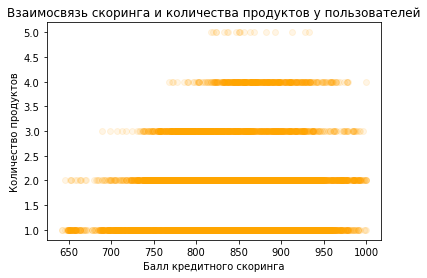

In [21]:
plt.scatter(data['score'], data['products'], color='orange', alpha=0.1)
plt.title('Взаимосвязь скоринга и количества продуктов у пользователей')
plt.xlabel('Балл кредитного скоринга')
plt.ylabel('Количество продуктов')
plt.show()

На графике видим, что взаимосвязь скоринга и количества продуктов у пользователя имеется: чем больше у клиента продуктов, тем выше минимальный балл скоринга среди клиентов.

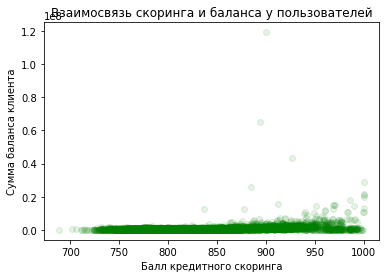

In [22]:
plt.scatter(data['score'], data['balance'], color='green', alpha=0.1)
plt.title('Взаимосвязь скоринга и баланса у пользователей')
plt.xlabel('Балл кредитного скоринга')
plt.ylabel('Сумма баланса клиента')
plt.show()

На графике видим, что клиенты с высоким балансом в бОльшей степени имеют высокий балл скоринга.

Проверим взаимосвязь возраста и дохода клиентов.

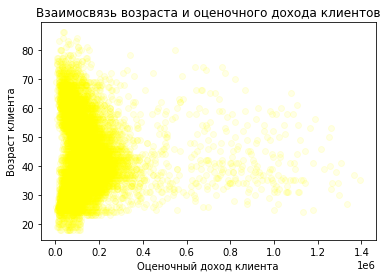

In [23]:
plt.scatter(data['est_salary'], data['age'], color='yellow', alpha=0.1)
plt.title('Взаимосвязь возраста и оценочного дохода клиентов')
plt.xlabel('Оценочный доход клиента')
plt.ylabel('Возраст клиента')
plt.show()

Исходя из графика видим, что высокий доход отсутствует среди самых молодых и пожилых клиентов. Наиболее высокий доход наблюдается у клиентов в возрасте от 25 до 60 лет.

Рассмотрим общую матрицу корреляции


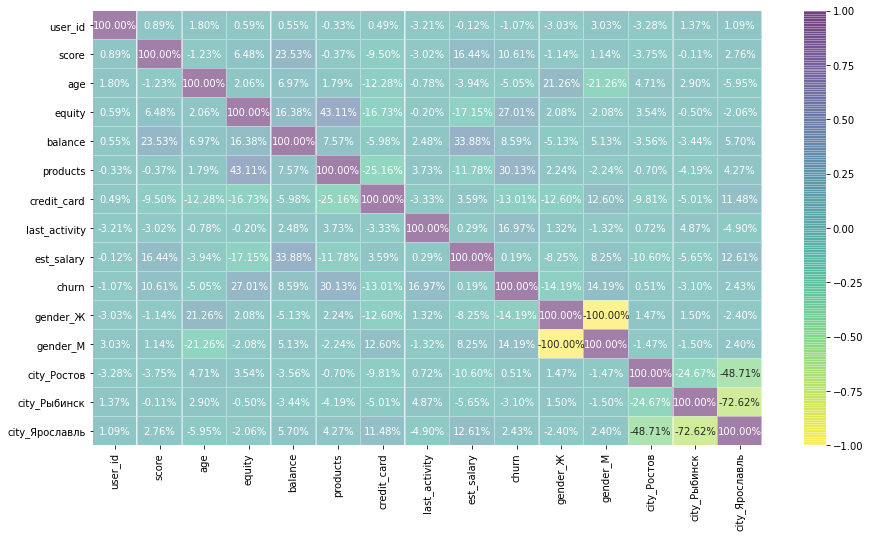

In [24]:
f, ax = plt.subplots(figsize=(15, 8))

sns.heatmap(data.corr(), annot=True, linewidths=0.5, ax=ax, center=0, cmap='viridis_r', fmt='.2%', alpha=0.5)
plt.show()

Исходя из тепловой карты больше всего влияют на отток количество продуктов у клиента и количество баллов собственности.
Также можно заметить, что самый высокий процент взаимосвязи между количеством продуктов и баллом собственности клиентов - 43,21%.

Для оценки корреляционного анализа возьмем за основу шкалу Чеддока:

- 0,1-0,3 - слабая взаимосвязь
- 0,3-0,5 - умеренная взаимосвязь
- 0,5-0,7 - заметная взаимосвязь
- 0,7-0,9 - высокая взаимосвязь
- 0,9-0,99 - весьма высокая связь

На основании данной шкалы можем увидеть следующие взаимосвязи показателей:

1. отток и балл скоринга - слабая взаимосвязь, 10,6%
2. отток и балл собственности - слабая, но ближе к умеренной - 27,06%
3. отток и количество продуктов - умеренная, 30%
4. отток и активность пользователя - слабая, 16,88%
5. отток и пол "М" - слабая, 14,1%
6. доход клиента и балл скоринга - слабая, 16,39% 
7. доход клиента и баланс - умеренная, 33,96%
8. количество продуктов и количество баллов собственности - умеренная, 43,21% - самая высокая взаимосвязь из всех
9. баланс и балл скоринга - слабая, 23,58%
10. баланс и доход клиента - слабая, 16,41%

Итак, можем увидеть, что заметные и сильные взаимосвязи между показателями отсутствуют.

Самая высокая связь из тех, что мы имеем, между количеством продуктов, которые использует клиент, и баллом собственности - 43,21%.

Далее рассмотрим средние показатели клиентов в разрезе отточности

In [25]:
data.groupby('churn').agg('mean').T.round(1)

churn                  0          1
user_id         171928.1   170992.8
score              845.4      863.4
age                 43.0       41.4
equity               2.4        3.8
balance         733031.6  1134458.2
products             1.8        2.4
credit_card          0.7        0.6
last_activity        0.5        0.7
est_salary      147674.6   148357.5
gender_Ж             0.5        0.3
gender_М             0.5        0.7
city_Ростов          0.1        0.1
city_Рыбинск         0.3        0.2
city_Ярославль       0.6        0.6

Видим, что более менее значительная разница присутствует в показателях скоринга, оценочного балла собственности, баланса клиента и количества продуктов, используемых клиентом.

Рассмотрим доли клиентов оттока в разрезе показателей.

In [26]:
fig = go.Figure(data=[go.Pie(labels=data['gender'], values=data['churn'], pull = [0.1, 0])])
fig.update_layout(title='Отток: соотношение мужчин(М) и женщин(Ж) среди пользователей',
                  width=800,
                  height=600,
                  annotations=[dict(x=1.12,
                                    y=1.05,
                                    text='Пол клиента',
                                    showarrow=False)])
fig.show()

In [27]:
fig = go.Figure(data=[go.Pie(labels=data['city'], values=data['churn'], pull = [0.1, 0])])
fig.update_layout(title='Отток: соотношение отточных пользователей в разрезе городов',
                  width=800,
                  height=600,
                  annotations=[dict(x=1.12,
                                    y=1.05,
                                    text='Город',
                                    showarrow=False)])
fig.show()

In [28]:
fig = go.Figure(data=[go.Pie(labels=data['last_activity'], values=data['churn'], pull = [0.1, 0])])
fig.update_layout(title='Отток: соотношение активных и неактивных пользователей',
                  width=800,
                  height=600,
                  annotations=[dict(x=1.12,
                                    y=1.05,
                                    text='Активность пользователей',
                                    showarrow=False)])
fig.show()


In [29]:
fig = go.Figure(data=[go.Pie(labels=data['credit_card'], values=data['churn'], pull = [0.1, 0])])
fig.update_layout(title='Отток: соотношение пользователей с кредитной картой и без',
                  width=800,
                  height=600,
                  annotations=[dict(x=1.12,
                                    y=1.05,
                                    text='Наличие кредитной карты',
                                    showarrow=False)])
fig.show()

In [30]:
fig = go.Figure(data=[go.Pie(labels=data['products'], values=data['churn'], pull = [0.1, 0])])
fig.update_layout(title='Отток: соотношение пользователей в зависимости от количества продуктов',
                  width=800,
                  height=600,
                  annotations=[dict(x=1.12,
                                    y=1.05,
                                    text='Количество продуктов',
                                    showarrow=False)])
fig.show()

По итогу просмотра отточных клиентов видим, что:

1. Мужчин среди отточных клиентов больше, чем женщин (65%/35%)
2. Среди отточных клиентов в разрезе городов лидирует Яролавль - 61,4%
3. Среди отточных клиентов больше активных, чем неактивных (70%/30%)
4. Среди отточных клиентов больше с кредиткой, чем без (55%/45%)
5. Больше половина среди отточных клиентов - это клиенты с двумя продуктами (53.8%)

# Исследование оттока в разрезе признаков

Баланс

Рассмотрим баланс клиентов среди действующих и отточных клиентов

In [31]:
data_blnc = data.pivot_table(index='city', columns='churn', values='balance', aggfunc='median').round().reset_index()
data_blnc

churn       city         0         1
0         Ростов  456079.0  656969.0
1        Рыбинск  474383.0  654049.0
2      Ярославль  483957.0  854100.0

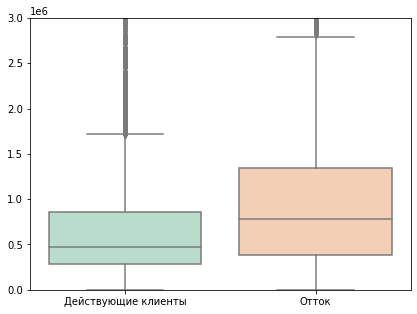

In [32]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(y = 'balance', x = 'churn', data = data, ax = plt.subplot(1, 2, 2), palette='Pastel2') 
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, 3000000)
plt.xticks(np.arange(2), ('Действующие клиенты', 'Отток'))
plt.show()

Видим, что медианное и среднее значение баланса действующих клиентов ниже примерно на 300000, чем у клиентов оттока.

Также видим, что среди жителей Ярославля показатель баланса значительно выше, чем среди жителей Ростова и Рыбинска.

Оценочный доход клиента

Рассмотрим доход клиента среди действующих и отточных

In [33]:
data_slr = data.pivot_table(index='city', columns='churn', values='est_salary', aggfunc='median').round().reset_index()
data_slr

churn       city         0         1
0         Ростов   97502.0  107449.0
1        Рыбинск  112115.0  119234.0
2      Ярославль  126642.0  131808.0

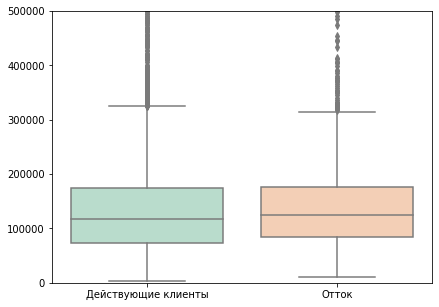

In [34]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(y = 'est_salary', x = 'churn', data = data, ax = plt.subplot(1, 2, 2), palette='Pastel2') 
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, 500000)
plt.xticks(np.arange(2), ('Действующие клиенты', 'Отток'))
plt.show()

Медианное значение оценочного дохода по отточным клиентам также выше, чем среди действующих клиентов.

# Распределение показателей

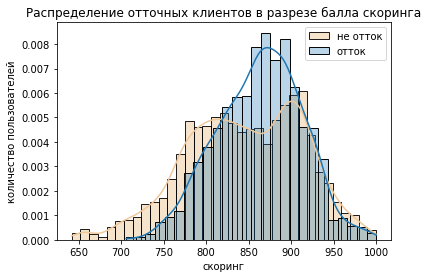

In [35]:
sns.histplot(data[data['churn']==0]['score'], label = 'не отток', color = '#EFC89B', kde=True, stat='density', common_norm=False)
sns.histplot(data[data['churn']==1]['score'], label = 'отток', alpha=0.3, kde=True, stat='density', common_norm=False)
plt.xlabel('скоринг')
plt.legend()
plt.ylabel('количество пользователей')
plt.title('Распределение отточных клиентов в разрезе балла скоринга')
plt.show()

В целом распределение отточных и действующих клиентов в разрезе скоринга достаточно пропорционально. 
Выбивается ряд клиентов с баллом скоринга от 830 до приблизительно 900 - здесь % отточных клиентов значительно выше по отношению к общему количеству клиентов.

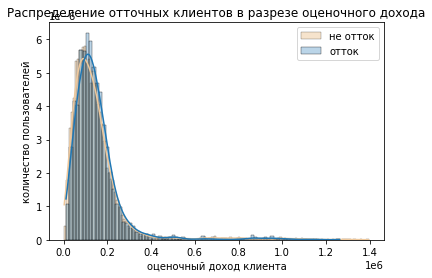

In [36]:
sns.histplot(data[data['churn']==0]['est_salary'], label = 'не отток', color = '#EFC89B', kde=True, stat='density', common_norm=False)
sns.histplot(data[data['churn']==1]['est_salary'], label = 'отток', alpha=0.3, kde=True, stat='density', common_norm=False)
plt.xlabel('оценочный доход клиента')
plt.legend()
plt.ylabel('количество пользователей')
plt.title('Распределение отточных клиентов в разрезе оценочного дохода')
plt.show()

Видим, что распределение в разрезе оценочного дохода отточных и действующих клиентов достаточно пропорционально.  Самый пик приходится на клиентов с доходом примерно 100 000 руб.

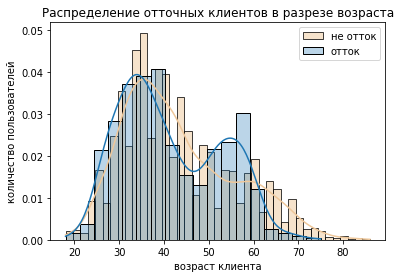

In [37]:
sns.histplot(data[data['churn']==0]['age'], label = 'не отток', color = '#EFC89B', kde=True, stat='density', common_norm=False)
sns.histplot(data[data['churn']==1]['age'], label = 'отток', alpha=0.3, kde=True, stat='density', common_norm=False)
plt.xlabel('возраст клиента')
plt.legend()
plt.ylabel('количество пользователей')
plt.title('Распределение отточных клиентов в разрезе возраста')
plt.show()

Распределение отточных и действующих клиентов в разрезе возраста не равномерно.
Видим, что среди клиентов от 25 до 35 больше отточных, и от 50 до 60 также доля отточных клиентов выше.

Для более понятной визуализации уберем временно значения баланса больше 15 млн руб. Их количество равно 11, данные это не исказит.

In [38]:
data_temp = data[data['balance'] < 15000000]

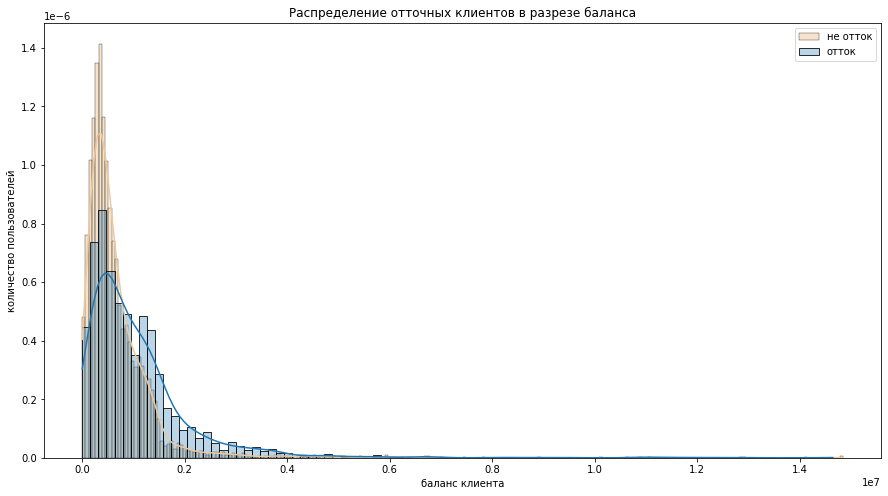

In [39]:
f, ax = plt.subplots(figsize=(15, 8))

sns.histplot(data_temp[data_temp['churn']==0]['balance'], label = 'не отток', color = '#EFC89B', kde=True, stat='density', common_norm=False)
sns.histplot(data_temp[data_temp['churn']==1]['balance'], label = 'отток', alpha=0.3, kde=True, stat='density', common_norm=False)
plt.xlabel('баланс клиента')
plt.legend()
plt.ylabel('количество пользователей')
plt.title('Распределение отточных клиентов в разрезе баланса')
plt.show()

Видим, что по клиентам с балансом свыше 1,1 млн. доля оттока выше.

In [40]:
equity_gr = data.pivot_table(index=['equity', 'churn'], values='user_id', aggfunc='count').reset_index().sort_values(by='user_id', ascending=False)
equity_gr.head(10)

equity  churn  user_id
0        0      0     2486
8        4      0     1383
10       5      0     1339
6        3      0     1219
4        2      0      885
2        1      0      680
11       5      1      576
9        4      1      464
7        3      1      321
5        2      1      166

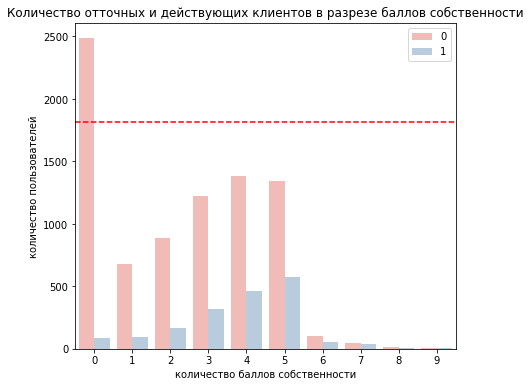

In [41]:
f, ax = plt.subplots(figsize=(15, 6))

sns.countplot(x = 'equity', hue = 'churn', data = data, ax = plt.subplot(1, 2, 1),  palette='Pastel1')
plt.ylabel('количество пользователей')
plt.xlabel('количество баллов собственности')
plt.title('Количество отточных и действующих клиентов в разрезе баллов собственности')
plt.axhline (y=1818, color='red', linestyle='--')
plt.legend()
plt.show()

Видна закономерность: чем выше балл собственности, тем выше процент оттока клиентов.

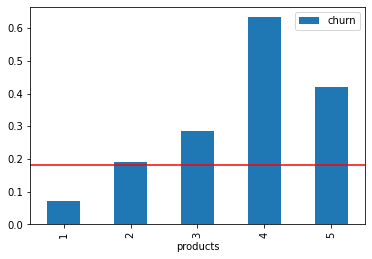

In [111]:
### КОД РЕВЬЮЕРА 2
data.groupby('products').agg({'churn':'mean'}).plot.bar().axhline(data.churn.mean(),c='red');

In [42]:
products_gr = data.pivot_table(index=['products', 'churn'], values='user_id', aggfunc='count').reset_index().sort_values(by='user_id', ascending=False)
products_gr

products  churn  user_id
2         2      0     4141
0         1      0     3088
3         2      1      978
4         3      0      741
7         4      1      300
5         3      1      297
1         1      1      235
6         4      0      174
8         5      0       11
9         5      1        8

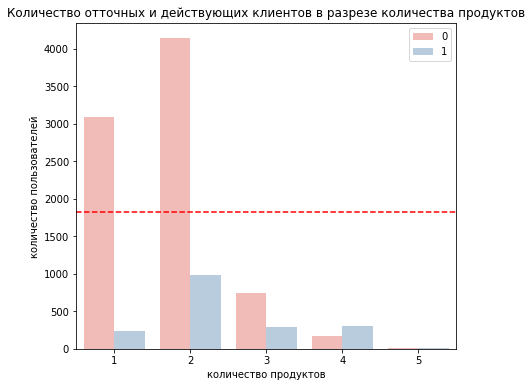

In [43]:
f, ax = plt.subplots(figsize=(15, 6))

sns.countplot(x = 'products', hue = 'churn', data = data, ax = plt.subplot(1, 2, 1),  palette='Pastel1')
plt.ylabel('количество пользователей')
plt.xlabel('количество продуктов')
plt.title('Количество отточных и действующих клиентов в разрезе количества продуктов')
plt.axhline (y=1818, color='red', linestyle='--')
plt.legend()
plt.show()

Самый низкий процент отточности по клиентам с одним продуктом. Далее, начиная с двух, процент оттока увеличивается, и по клиентам с четырьмя продуктами процент оттока превышает количество неотточных клиентов.

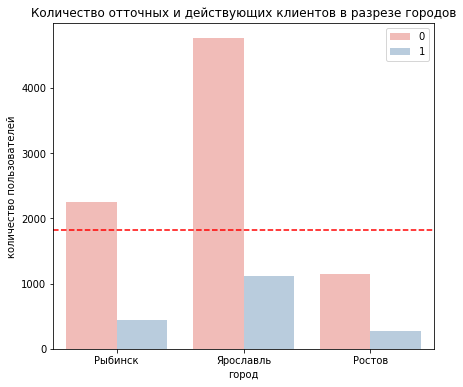

In [44]:
f, ax = plt.subplots(figsize=(15, 6))

sns.countplot(x = 'city', hue = 'churn', data = data, ax = plt.subplot(1, 2, 1),  palette='Pastel1')
plt.ylabel('количество пользователей')
plt.xlabel('город')
plt.title('Количество отточных и действующих клиентов в разрезе городов')
plt.axhline (y=1818, color='red', linestyle='--')
plt.legend()
plt.show()

Доля оттока в городах примерно равна - в Рыбинске немного меньше, чем в Ростове и Ярославле.

По количеству клиентов большая часть находится в Ярославле.

# Определение относительных значений по категориям и сегментация пользователей

Рассмотрим показатель отточности в зависимости от пола клиента

In [45]:
data_gender = data.pivot_table(index='gender', columns='churn', values='user_id', aggfunc='count', margins=True).reset_index()
data_gender = data_gender.rename(columns={0: 'churn_0', 1: 'churn_1'})
data_gender['% churn'] = round(data_gender['churn_1']/data_gender['All']*100)
data_gender = data_gender.query('gender != "All"')
data_gender.sort_values(by='% churn', ascending=False)

churn gender  churn_0  churn_1   All  % churn
1          М     3808     1183  4991     24.0
0          Ж     4347      635  4982     13.0

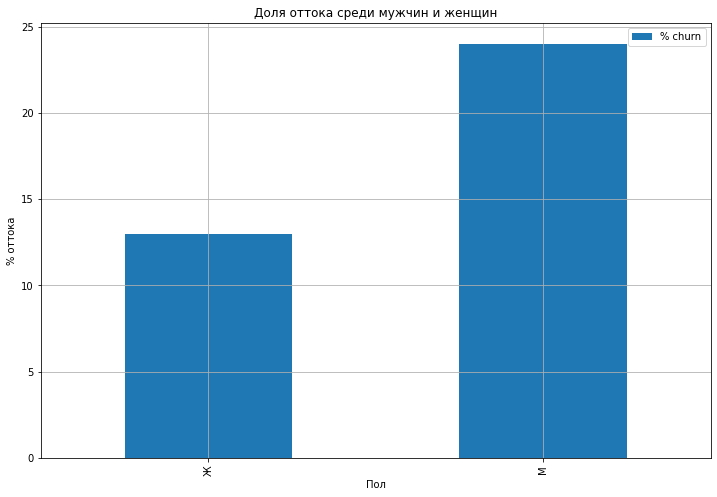

In [46]:
data_gender.plot(x='gender', y='% churn', grid=True, figsize=(12,8), kind='bar')
plt.title('Доля оттока среди мужчин и женщин')
plt.xlabel('Пол')
plt.ylabel('% оттока')
plt.show()

В разрезе пола доля оттока среди мужчин значительно выше.

Рассмотрим показатель оттока в разрезе городов

In [47]:
data_city = data.pivot_table(index='city', columns='churn', values='user_id', aggfunc='count', margins=True).reset_index()
data_city = data_city.rename(columns={0: 'churn_0', 1: 'churn_1'})
data_city['% churn'] = round(data_city['churn_1']/data_city['All']*100)
data_city = data_city.query('city != "All"')
data_city.sort_values(by='% churn', ascending=False)

churn       city  churn_0  churn_1   All  % churn
0         Ростов     1151      265  1416     19.0
2      Ярославль     4758     1117  5875     19.0
1        Рыбинск     2246      436  2682     16.0

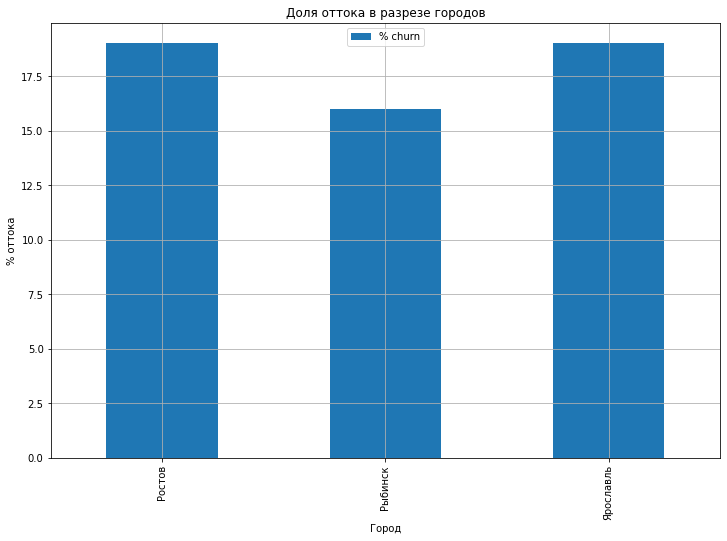

In [48]:
data_city.plot(x='city', y='% churn', grid=True, figsize=(12,8), kind='bar')
plt.title('Доля оттока в разрезе городов')
plt.xlabel('Город')
plt.ylabel('% оттока')
plt.show()

По количеству больше всего отточных клиентов в Ярославле.

По проценту оттока Ярославль и Ростов находятся на одном уровне, где % оттока соствляет 19%

В Рыбинске данный показатель немного лучше и составляет 16%

Рассмотрим отток в зависимости от активности пользователей

In [49]:
data_la = data.pivot_table(index='last_activity', columns='churn', values='user_id', aggfunc='count', margins=True).reset_index()
data_la = data_la.rename(columns={0: 'churn_0', 1: 'churn_1'})
data_la['% churn'] = round(data_la['churn_1']/data_la['All']*100)
data_la = data_la.query('last_activity != "All"')
data_la.sort_values(by='% churn', ascending=False)

churn last_activity  churn_0  churn_1   All  % churn
1                 1     3938     1277  5215     24.0
0                 0     4217      541  4758     11.0

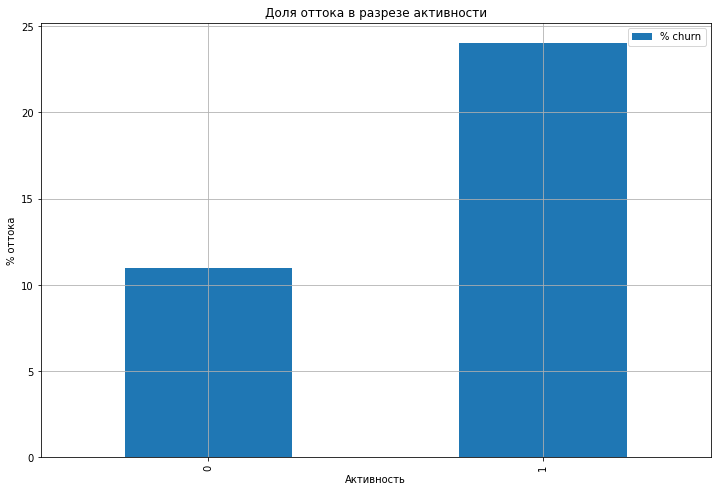

In [50]:
data_la.plot(x='last_activity', y='% churn', grid=True, figsize=(12,8), kind='bar')
plt.title('Доля оттока в разрезе активности')
plt.xlabel('Активность')
plt.ylabel('% оттока')
plt.show()

Среди клиентов с последней активностью доля отточных больше чем в 2 раза выше, чем действующих

Рассмотрим клиентов на показатель отточности в разрезе использования кредитной карты

In [51]:
data_сс = data.pivot_table(index='credit_card', columns='churn', values='user_id', aggfunc='count', margins=True).reset_index()
data_сс = data_сс.rename(columns={0: 'churn_0', 1: 'churn_1'})
data_сс['% churn'] = round(data_сс['churn_1']/data_сс['All']*100)
data_сс = data_сс.query('credit_card != "All"')
data_сс.sort_values(by='% churn', ascending=False)

churn credit_card  churn_0  churn_1   All  % churn
0               0     2374      815  3189     26.0
1               1     5781     1003  6784     15.0

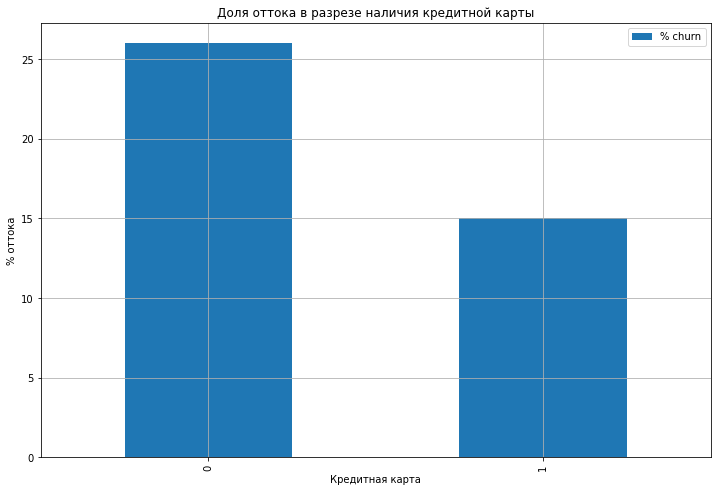

In [52]:
data_сс.plot(x='credit_card', y='% churn', grid=True, figsize=(12,8), kind='bar')
plt.title('Доля оттока в разрезе наличия кредитной карты')
plt.xlabel('Кредитная карта')
plt.ylabel('% оттока')
plt.show()

Общее количество клиентов с кредитной картой в 2 раза больше, чем без. Процент оттока выше среди клиентов без кредитной карты.

Рассмотрим показатель отточности в зависимости от количества продуктов у клиента

In [53]:
data_product = data.pivot_table(index='products', columns='churn', values='user_id', aggfunc='count', margins=True).reset_index()
data_product = data_product.rename(columns={0: 'churn_0', 1: 'churn_1'})
data_product['% churn'] = round(data_product['churn_1']/data_product['All']*100)
data_product = data_product.query('products != "All"')
data_product.sort_values(by='% churn', ascending=False)

churn products  churn_0  churn_1   All  % churn
3            4      174      300   474     63.0
4            5       11        8    19     42.0
2            3      741      297  1038     29.0
1            2     4141      978  5119     19.0
0            1     3088      235  3323      7.0

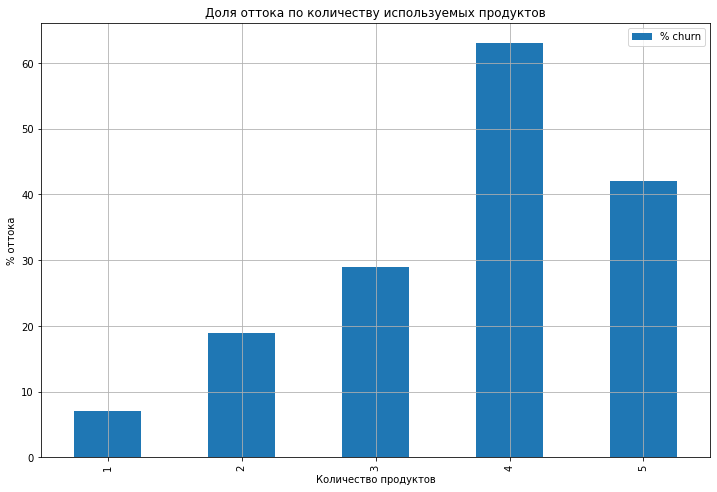

In [54]:
data_product.plot(x='products', y='% churn', grid=True, figsize=(12,8), kind='bar')
plt.title('Доля оттока по количеству используемых продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('% оттока')
plt.show()

Самый высокий процент оттока у пользователей с четырьмя и пятью продуктами (63% и 42%)

По количеству самый высокий отток у пользователей с двумя продуктами - 53,8% от общего числа оттока.

Рассмотрим средний возраст клиентов среди действующих и отточных

Создадим функцию для категоризации возраста пользователей и добавим столбец в общую таблицу с категорией возраста

In [55]:
def categorize_age(age):
    try:
        if 18 <= age <= 25:
            return '18-25'
        elif 26 <= age <= 35:
            return '26-35'
        elif 36 <= age <= 45:
            return '36-45'
        elif 46 <= age <= 60:
            return '46-60'
        elif age > 60:
            return '>60'
    except:
        pass

Рассмотрим категории клиентов исходя из периода сотрудничества с банком

Поскольку ID клиента присваивается порядковым образом, то, чем меньше число ID, тем дольше клиент сотрудничает в банком. Рассмотрим информацию об ID клиентов и создадим функцию, которая разделит клиентов на категории исходя из порядкового номера ID

In [58]:
data['user_id'].describe()

count      9973.000000
mean     171757.616966
std       33696.365256
min       94561.000000
25%      142757.000000
50%      172651.000000
75%      201164.000000
max      229145.000000
Name: user_id, dtype: float64

In [59]:
def categorize_id(user_id):
    try:
        if 94000 <= user_id <= 143000:
            return 'A'
        elif 143001 <= user_id <= 173000:
            return 'B'
        elif 173001 <= user_id <= 202000:
            return 'C'
        elif user_id > 202001:
            return 'D'
    except:
        pass

In [60]:
data['id_category'] = data['user_id'].apply(categorize_id)
data.head()

user_id  score   age  equity     balance  products  credit_card  \
0   183012  850.0  25.0       1    59214.82         2            0   
1   146556  861.0  37.0       5   850594.33         3            1   
2   120722  892.0  30.0       0         NaN         1            1   
3   225363  866.0  51.0       5  1524746.26         2            0   
4   157978  730.0  34.0       5      174.00         1            1   

   last_activity  est_salary  churn  gender_Ж  gender_М  city_Ростов  \
0              1    75719.14      1         1         0            0   
1              0    86621.77      0         1         0            0   
2              1   107683.34      0         1         0            0   
3              1   174423.53      1         1         0            0   
4              0    67353.16      1         0         1            0   

   city_Рыбинск  city_Ярославль       city gender id_category  
0             1               0    Рыбинск      Ж           C  
1             1               0    Рыбинск      Ж           B  
2             1               0    Рыбинск      Ж           A  
3             0               1  Ярославль      Ж           D  
4             0               1  Ярославль      М           B

In [61]:
data_id = data.pivot_table(index='id_category', columns='churn', values='user_id', aggfunc='count', margins=True).reset_index()
data_id = data_id.rename(columns={0: 'churn_0', 1: 'churn_1'})
data_id['% churn'] = round(data_id['churn_1']/data_id['All']*100)
data_id.sort_values(by='% churn', ascending=False)

churn id_category  churn_0  churn_1   All  % churn
0               A     2038      477  2515     19.0
1               B     2035      473  2508     19.0
3               D     1960      447  2407     19.0
4             All     8155     1818  9973     18.0
2               C     2122      421  2543     17.0

In [62]:
fig = go.Figure(data=[go.Pie(labels=data['id_category'], values=data['churn'], pull = [0.1, 0])])
fig.update_layout(title='Отток: соотношение пользователей в зависимости от периода регистрации',
                  width=800,
                  height=600,
                  annotations=[dict(x=1.12,
                                    y=1.05,
                                    text='Категория клиента исходя из даты регистрации',
                                    showarrow=False)])
fig.show()

Видим, что взаимосвязь между сроком взаимодействия с клиентом и его желанием прекратить сотрудничество, отсутствует, аномальных значений не выявлено. Процент оттока в каждой из выделенных категорий находится в диапазоне от 17% до 19%.

По количеству отточных клиентов в каждой из категорий значение тоже находится приблизительно на одном уровне.

# Сегментация клиентов в разрезе использования количества продуктов

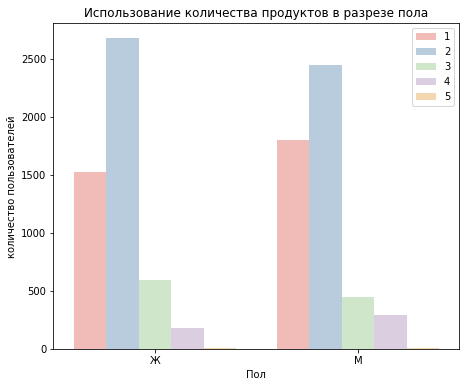

In [63]:
fig, ax = plt.subplots(figsize = (16, 6))
sns.countplot(x = 'gender', hue = 'products', data = data, ax = plt.subplot(1, 2, 1),  palette='Pastel1')
plt.ylabel('количество пользователей')
plt.xlabel('Пол')
plt.title('Использование количества продуктов в разрезе пола')
plt.legend()
plt.show()

Среди и женщин, и мужчин больше используют 2 продукта - количество таких клиентов больше среди женщин.

На втором месте клиенты, использующие один продукт - таких больше среди мужчин.

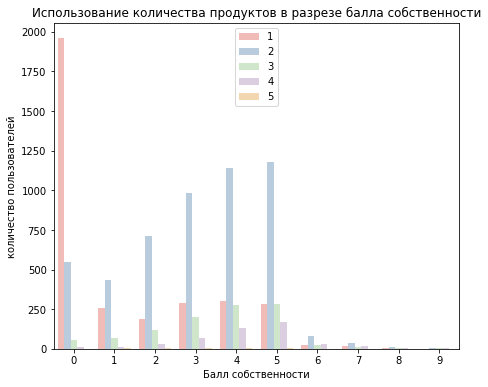

In [64]:
fig, ax = plt.subplots(figsize = (16, 6))
sns.countplot(x = 'equity', hue = 'products', data = data, ax = plt.subplot(1, 2, 1),  palette='Pastel1')
plt.ylabel('количество пользователей')
plt.xlabel('Балл собственности')
plt.title('Использование количества продуктов в разрезе балла собственности')
plt.legend()
plt.show()


Больше всего продуктов используется среди клиентов с баллом собственности 0.

С увеличением балла собственности видим рост клиентов, использующих 2 продукта.

Также с увеличением балла собственности заметна динамика использования продуктов от 3х и более.

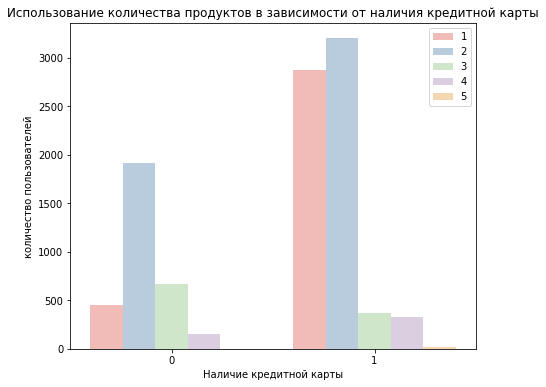

In [65]:
fig, ax = plt.subplots(figsize = (16, 6))
sns.countplot(x = 'credit_card', hue = 'products', data = data, ax = plt.subplot(1, 2, 1),  palette='Pastel1')
plt.ylabel('количество пользователей')
plt.xlabel('Наличие кредитной карты')
plt.title('Использование количества продуктов в зависимости от наличия кредитной карты')
plt.legend()
plt.show()

Клиенты без кредитной карты чаще используют 2 продукта

Клиенты с кредитной картой также используют чаще 2 продукта, но и один продукт среди данной категории клиентов так же популярен

Клиенты без кредитной карты чаще используют 3 продукта, чем клиенты с кредитной картой

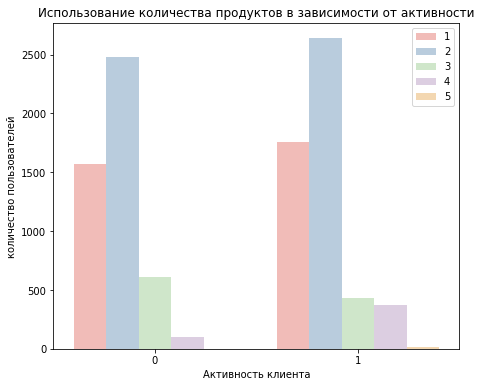

In [66]:
fig, ax = plt.subplots(figsize = (16, 6))
sns.countplot(x = 'last_activity', hue = 'products', data = data, ax = plt.subplot(1, 2, 1),  palette='Pastel1')
plt.ylabel('количество пользователей')
plt.xlabel('Активность клиента')
plt.title('Использование количества продуктов в зависимости от активности')
plt.legend()
plt.show()

Среди активных и неактивных клиентов одинаково популярны один и два продукта.

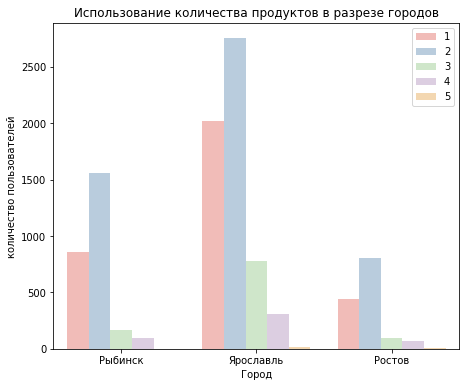

In [67]:
fig, ax = plt.subplots(figsize = (16, 6))
sns.countplot(x = 'city', hue = 'products', data = data, ax = plt.subplot(1, 2, 1),  palette='Pastel1')
plt.ylabel('количество пользователей')
plt.xlabel('Город')
plt.title('Использование количества продуктов в разрезе городов')
plt.legend()
plt.show()

Среди всех трех городов в одинаковой степени популярны и используются один и два продукта.

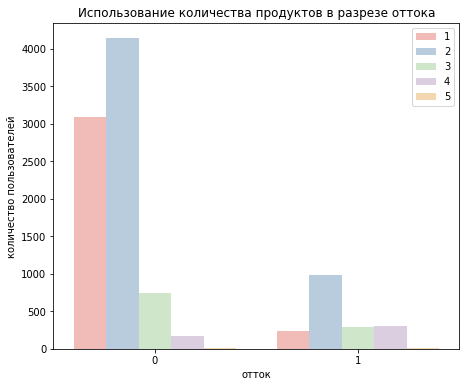

In [68]:
fig, ax = plt.subplots(figsize = (16, 6))
sns.countplot(x = 'churn', hue = 'products', data = data, ax = plt.subplot(1, 2, 1),  palette='Pastel1')
plt.ylabel('количество пользователей')
plt.xlabel('отток')
plt.title('Использование количества продуктов в разрезе оттока')
plt.legend()
plt.show()

Видим, среди отточных клиентов больше всего с двумя продуктами, меньше всего - с одним.

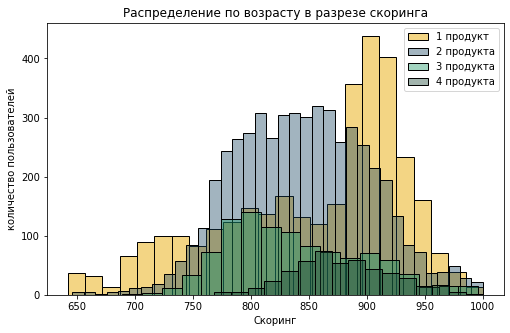

In [69]:
fig, ax = plt.subplots(figsize = (18, 5))
    
sns.histplot(data[data['products']==1]['score'], label = '1 продукт', color = '#EFC85B', ax = plt.subplot(1, 2, 1))
sns.histplot(data[data['products']==2]['score'], label = '2 продукта', color = '#184561', ax = plt.subplot(1, 2, 1), alpha=.4)
sns.histplot(data[data['products']==3]['score'], label = '3 продукта', color = '#189562', ax = plt.subplot(1, 2, 1), alpha=.4)
sns.histplot(data[data['products']==4]['score'], label = '4 продукта', color = '#184532', ax = plt.subplot(1, 2, 1), alpha=.4)
plt.xlabel('Скоринг')
plt.ylabel('количество пользователей')
plt.title('Распределение по возрасту в разрезе скоринга')
plt.legend()
plt.show()

Среднее распределение баллов скоринга от 750 до 950 среди клиентов с продуктами от 2 до 4. 
Заметен скачок клиентов с одним продуктом в промежутке балла от 850 до 950.

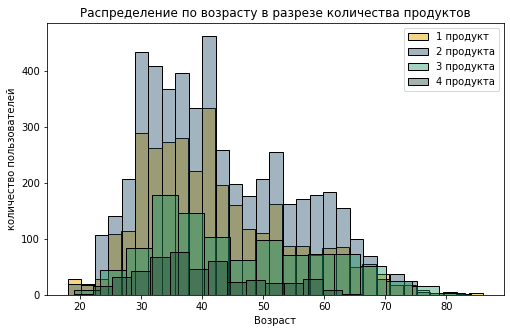

In [70]:
fig, ax = plt.subplots(figsize = (18, 5))
    
sns.histplot(data[data['products']==1]['age'], label = '1 продукт', color = '#EFC85B', ax = plt.subplot(1, 2, 1))
sns.histplot(data[data['products']==2]['age'], label = '2 продукта', color = '#184561', ax = plt.subplot(1, 2, 1), alpha=.4)
sns.histplot(data[data['products']==3]['age'], label = '3 продукта', color = '#189562', ax = plt.subplot(1, 2, 1), alpha=.4)
sns.histplot(data[data['products']==4]['age'], label = '4 продукта', color = '#184532', ax = plt.subplot(1, 2, 1), alpha=.4)
plt.xlabel('Возраст')
plt.ylabel('количество пользователей')
plt.title('Распределение по возрасту в разрезе количества продуктов')
plt.legend()
plt.show()

Достаточно равномерное и пропорциональное распределение.

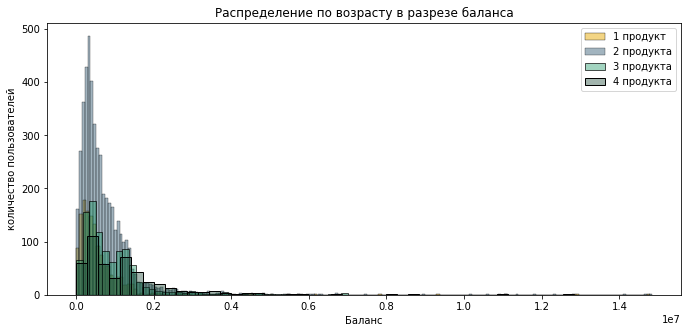

In [71]:
fig, ax = plt.subplots(figsize = (25, 5))
    
sns.histplot(data_temp[data_temp['products']==1]['balance'], label = '1 продукт', color = '#EFC85B', ax = plt.subplot(1, 2, 1))
sns.histplot(data_temp[data_temp['products']==2]['balance'], label = '2 продукта', color = '#184561', ax = plt.subplot(1, 2, 1), alpha=.4)
sns.histplot(data_temp[data_temp['products']==3]['balance'], label = '3 продукта', color = '#189562', ax = plt.subplot(1, 2, 1), alpha=.4)
sns.histplot(data_temp[data_temp['products']==4]['balance'], label = '4 продукта', color = '#184532', ax = plt.subplot(1, 2, 1), alpha=.4)
plt.xlabel('Баланс')
plt.ylabel('количество пользователей')
plt.title('Распределение по возрасту в разрезе баланса')
plt.legend()
plt.show()

Также достаточно равномерное и пропорциональное распределение. Больше всего клиентов с двумя продуктами.

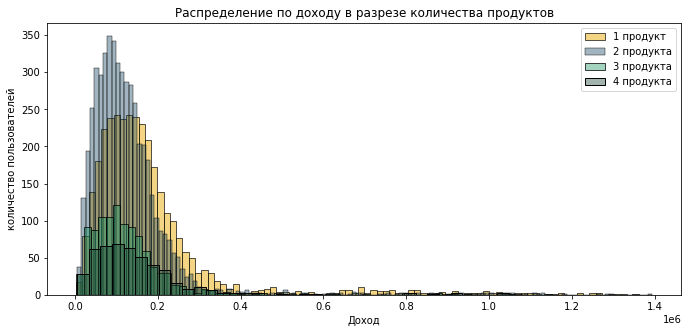

In [72]:
fig, ax = plt.subplots(figsize = (25, 5))
    
sns.histplot(data[data['products']==1]['est_salary'], label = '1 продукт', color = '#EFC85B', ax = plt.subplot(1, 2, 1))
sns.histplot(data[data['products']==2]['est_salary'], label = '2 продукта', color = '#184561', ax = plt.subplot(1, 2, 1), alpha=.4)
sns.histplot(data[data['products']==3]['est_salary'], label = '3 продукта', color = '#189562', ax = plt.subplot(1, 2, 1), alpha=.4)
sns.histplot(data[data['products']==4]['est_salary'], label = '4 продукта', color = '#184532', ax = plt.subplot(1, 2, 1), alpha=.4)
plt.xlabel('Доход')
plt.ylabel('количество пользователей')
plt.title('Распределение по доходу в разрезе количества продуктов')
plt.legend()
plt.show()

Из общего распределения выбивается категория клиентов с одним продуктом - в этой категории находится больше клиентов с высоким доходом, чем в остальных.

# Вывод

На основании проведенного анализа можно сделать следующие выводы:

1. В данной выборке после удаления части пропущенных значений у нас имеется 9973 записи.

2. Большая часть - это стабильные клиенты с результатом кредотного скоринга от 750 до 900, что является достаточно хорошим показателем для получения кредита.

3. Клиентам от 18 до 86 лет, в среднем клиенту около 42 лет.

4. По половому признаку клиенты распределены приблизительно в равном соотношении 50/50.

5. Средний балл собственности среди клиентов составляет 2,63

6. На счету у них в среднем около 83 000р.

7. В среднем клиенты пользуются 1-2 продуктами.

8. Большинство клиентов имеют кредитную карту.

9. Примерно 52% клиентов являются активными бользователями банка.

10. Средний доход клиентов в зависимости от городов составляет от 97 000 руб до 130 000 руб.

11. Средний процент оттока в данной выборке составляет 18%.

# Проверка гипотез

# Гипотеза 1

В процессе анализа нам требуется проверить гипотезу о том, что есть различия в возрасте между клиентами, которые пользуются одним продуктом банка и теми, которые пользуются двумя продуктами банка.

Проверим распределение данных:

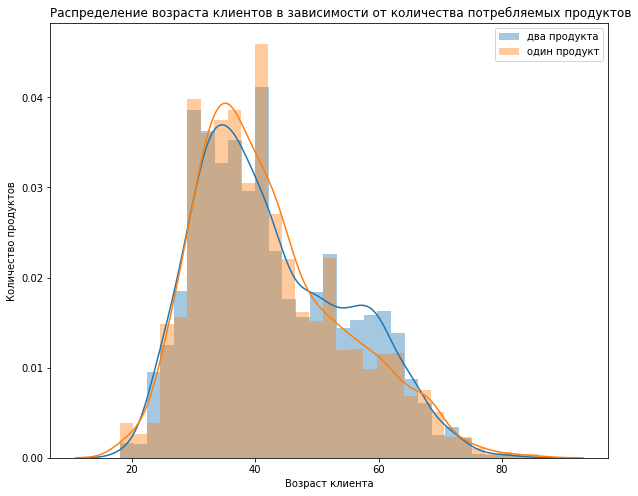

In [73]:
plt.figure(figsize=(10, 8))

sns.distplot(data[data['products'] == 2]['age'], label = 'два продукта')
sns.distplot(data[data['products'] < 2]['age'], label = 'один продукт')

plt.title('Распределение возраста клиентов в зависимости от количества потребляемых продуктов', loc='left')
plt.xlabel('Возраст клиента')
plt.ylabel('Количество продуктов')
plt.legend()
plt.show()

Проверим распределение на нормальность статистическим тестом Шапиро.

Проверка распределения данных на нормальность необходима для того, чтобы убедиться в отсутствии выбросов, аномалий и том, что результаты теста будут корректными, без каких-либо искажений.

In [74]:
x1=data[data['products'] == 2]['age'].to_list()
x2=data[data['products'] < 2]['age'].to_list()
res = stats.shapiro(x1)
res.statistic

0.9615522027015686

In [75]:
alpha = 0.05

results = stats.shapiro(x1)
p_value = results[
    1
]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  7.941429186486062e-35
Отвергаем нулевую гипотезу: распределение не нормально


In [76]:
res = stats.shapiro(x2)
res.statistic

0.9569536447525024

In [77]:
alpha = 0.05

results = stats.shapiro(x2)
p_value = results[1]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  2.7809143816725107e-30
Отвергаем нулевую гипотезу: распределение не нормально


Распределение в обеих группах проведено не нормально.

Проверим гипотезу, введем нулевую и альтернативную гипотезы.

    - H0: возраст клиентов, которые пользуются двумя продуктами банков, одинаков с возрастом клиентов, которые пользуются одним продуктом
    - H1: возраст клиентов, которые пользуются двумя продуктами банков, отличается от возраста клиентов, которые пользуются одним продуктом
    
Уровень значимости зададим обычный: α = 0.05

Для проверки будем использовать непараметрический тест Уилкоксона-Манна-Уитни, т.к. он подходит для малых выборок в диапазоне от 3 до приблизительно 60 человек и применяется при различных нормах распределения данных.

In [78]:
alpha = .05      
results = stats.mannwhitneyu(data[data['products'] == 2]['age'], 
                             data[data['products'] == 1]['age'])

print('p-значение: ', results.pvalue)    

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.057138410813417605
Не получилось отвергнуть нулевую гипотезу


Также проверим гипотезу дополнительно через t-тест

In [79]:
alpha = .05      
results = stats.ttest_ind(data[data['products'] == 2]['age'], 
                          data[data['products'] == 1]['age'])

print('p-значение: ', results.pvalue)    

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.03351546829239861
Отвергаем нулевую гипотезу


Требования к проведению u-теста:

1. Малый размер выборок (от 3 до 60 человек)
2. Выборки не должны сильно различаться по количеству (у нас обе выборки состоят из 66 человек)
3. Можно использовать при отсутствии нормального распределения

Требования к проведению t-теста:

1. Распределение выборок, близкое к нормальному

Поскольку при проверке было выявлено, что распределение не нормально, более корректным будем считать результат u-теста. 

Гипотезу о том, что возраст клиентов, которые пользуются одним и двумя продуктами, одинаков, не получилось отвергнуть.


Не получилось отвергнуть нулевую гипотезу:

то, что возраст клиентов, которые пользуются одним продуктом банка, и возраст клиентов, которые пользуются двумя продуктами банка, одинаков, не получилось отвергнуть.

# Гипотеза 2

Также есть еще одна гипотеза, которую нам необходимо проверить - различие дохода действующих и отточных клиентов.

Проверим данные на нормальность.

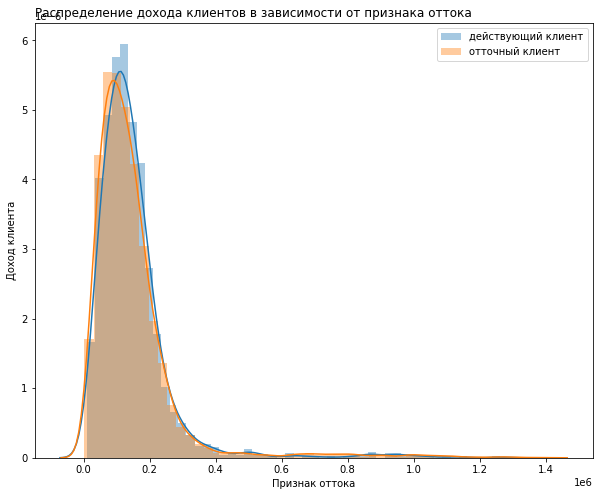

In [80]:
plt.figure(figsize=(10, 8))

sns.distplot(data[data['churn'] == 1]['est_salary'], label = 'действующий клиент')
sns.distplot(data[data['churn'] == 0]['est_salary'], label = 'отточный клиент')

plt.title('Распределение дохода клиентов в зависимости от признака оттока', loc='left')
plt.xlabel('Признак оттока')
plt.ylabel('Доход клиента')
plt.legend()
plt.show()

Видим, что данные распределены нормально.

In [81]:
x3=data[data['churn'] == 1]['est_salary'].to_list()
x4=data[data['churn'] == 0]['est_salary'].to_list()

In [82]:
alpha = 0.05

results = stats.shapiro(x3)
p_value = results[
    1
]
print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')


p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [83]:
alpha = 0.05

results = stats.shapiro(x4)
p_value = results[
    1
]
print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Введем нулевую и альтернативную гипотезы:

    - H0: доход клиентов, которые находятся в категории оттока, и у действующих клиентов, одинаков. 
    - H1: доход клиентов, которые находятся в категории оттока, и у действующих клиентов, различается.
    
Уровень значимости установим стандартный: α = 0.05

Для расчета p-value будем использовать ttest для сравнения двух средних выборок.
Проверка данных на нормальность распределения показала, что распределение не нормально, в связи с этим при проведении теста используем параметр equal_var=False

In [84]:
alpha = 0.05   

results = stats.ttest_ind(data[data['churn'] == 0]['est_salary'], 
                             data[data['churn'] == 1]['est_salary'],
                             equal_var=False)

print('p-значение: ', results.pvalue)    # тест двухсторонний

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.8354803526840116
Не получилось отвергнуть нулевую гипотезу


p-value значительно выше заданного уровня значимости, в связи с чем гипотезу отвергнуть не получилось.

Делаем вывод, что доход клиентов, которые находятся в категории оттока, в среднем равен доходу действующих клиентов.

Проверим также гипотезу с помощью u-теста

In [85]:
alpha = 0.05   

results = stats.mannwhitneyu(data[data['churn'] == 0]['est_salary'], 
                             data[data['churn'] == 1]['est_salary'])

print('p-значение: ', results.pvalue)    # тест двухсторонний

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.00016830729188229058
Отвергаем нулевую гипотезу


В данном случае стоит выбрать результат t-теста, т.к. он будет более подходящим с учетом размера выборки.

U-тест не подходит для проверки такого количества записей.

На основании этого можем сделать вывод, что не получилось отвергнуть нулевую гипотезу: доход клиентов категории оттока и действующих клиентов одинаков.

# Вывод

На данном этапе мы проверили две гипотезы:
    
    1. Возраст клиентов, которые пользуются одним продуктом банка, и возраст клиентов, которые пользуются двумя продуктами банков, одинаков - не получилось отвергнуть.

    2. Между доходом клиентов, которые находятся в категории оттока, и доходом действующих клиентов, нет различий - не получилось отвергнуть.

# Промежуточные итоги и выделение показателей, которые влияют на отточность клиентов, для дальнейшей сегментации

На основании уже проведенных этапов анализа можно выделить следующие показатели, которые могут влиять на отток клиентов:
    
    1. Количество продуктов, которые использует клиент: чем больше у клиента продуктов, тем выше процент оттока клиентов
    2. Пол и возраст клиента: клиенты в возрасте от 46 до 60 лет и от 26 до 35 лет имею бОльший процент оттока по сравнению с другими возрастными категориями клиентов, также среди мужчин наблюдается больше клиентов в категории оттока, чем среди женщин.
    3. Активность клиентов и местонахождение: процент оттока по клиентам с последней активностью значительно выше, чем по клиентам без активности. В городах процент оттока приблизительно одинаковый: в Ростове и Ярославле - 19%, в Рыбинске немного ниже - 16%
    4. Наличие кредитной карты: процент оттока по клиентам без кредитной карты значительно выше, чем по клиентам с кредитной картой
    5. Балл собственности: чем выше балл собственности, тем выше процент оттока клиентов
    
Также по итогам проведенного анализа можно отметить:

    1. Наблюдается взаимосвязь количества продуктов и балла скоринга - чем больше у клиента количество продуктом, те выше минимальный балл скоринга
    2. Наблюдается взаимосвязь баланса клиента и балла скоринга - чем больше баланс, тем выше балл скоринга
    3. Наиболее высокий доход наблюдается у клиентов в возрасте от 25 до 60 лет
    4. У клиентов с баллом скоринга от 850 до 880 процент оттока значительно выше, чем у остальных
    5. В городах процент оттока приблизительно одинаковый: в Ростове и Ярославле - 19%, в Рыбинске немного ниже - 16%
    6. Взаимосвязь оттока с продолжительностью сотрудничества клиента и банка не выявлена
    7. Медианное значение баланса действующих клиентов значительно ниже медианного значения клиентов из категории оттока
    8. Медианное значение оценочного дохода действующих клиентов ниже медианного значения клиентов из категории оттока
        
Попробуем более детально рассмотреть данные показатели в разрезе использования продуктов для формирования более точных портретов клиентов.

Для этого следующим этапом проведем сегментацию клиентов в разрезе выделенных показателей.

# Вывод 2

1. score - по итогам корреляционного анализа наблюдается слабая взаимосвязь скора с оттоком, доходом клиента и балансом. Также наблюдается превышение отточных клиентов по отношению к действуюшим с количеством баллов от 830 до 900. Среднее распределение баллов скоринга от 750 до 950 среди клиентов с продуктами от 2 до 4. Заметен скачок клиентов с одним продуктом в промежутке балла от 850 до 950.

2. city - доля оттока в Рыбинске на 3% ниже, чем в Ярославле или Ростове. Взаимосвязь с показателями отсутствует. Интервал оттока от 16% до 19%.

3. gender - показатель отточности среди мужчин 24% среди женщин - 13%. У мужчин данный показатель в 2 раза больше, чем у женщин. Среди и женщин, и мужчин больше используют 2 продукта - количество таких клиентов больше среди женщин. На втором месте клиенты, использующие один продукт - таких больше среди мужчин.

4. age - значительное превышение клинтов оттока над действующими наблюдается среди клиентов от 50 до 60 лет.

5. equity - согласно корреляционному анализу, имеется взаимосвязь с балансом клиента, количеством продуктов и оттоком. Чем выше у клиента балл собственности, тем выше процент оттока. Больше всего продуктов используется среди клиентов с баллом собственности 0. С увеличением балла собственности видим рост клиентов, использующих 2 продукта. Также с увеличением балла собственности заметна динамика использования продуктов от 3х и более.

6. balance - согласно корреляционному анализу имеется взаимосвязь с доходом клиента, баллом собственности и скорингом. Клиенты с балансом свыше 1,1 млн. в большей степени являются отточными.

7. products - согласно корреляционному анализу, имеется взаимосвязь с баллом собственности и оттоком. Чем больше продуктов, тем выше процент оттока. Начиная от 3х продуктов процент оттока превышает норму. В категории клиентов с одним продуктом находится больше клиентов с высоким доходом, чем в остальных.

8. credit_card - процент оттока выше среди клиентов без кредитной карты почти в 2 раза, по сравнению с клиентами, использующими кредитную карту

9. last_activity - согласно корреляционному анализу, есть взаиосвязь с оттоком: среди активных клиентов процент оттока в 2 раза выше, чем среди неактивных. Среди активных и неактивных клиентов одинаково популярны один и два продукта.

10. est_salary - согласно корреляционному анализу, есть взаимосвязь с баллом скоринга, балансом и оттоком. 

На основании проведенного анализа предлагаем для дальнейшей сегментации выделить следующие категории:

    - клиенты с баллом скоринга от 850 до 900 и одним продуктом
    - клиенты с суммой на балансе свыше 10 млн.
    - клиенты от 50 до 60 лет


# Сегментация клиентов на основе выделенных показателей

# Анализ доли оттока в разрезе выделенных сегментов

Рассмотрим клиентов в разрезе потреблямых продуктов:

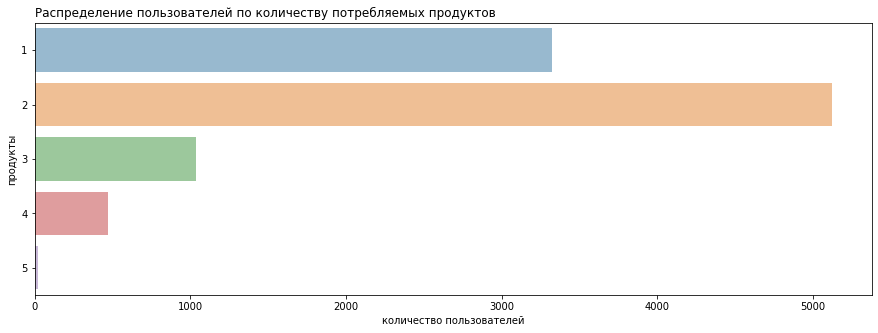

In [86]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='count', 
                 y='products', 
                 data=data.groupby('products').agg(count=('user_id','count')).reset_index(), 
                 orient='h', alpha=0.5)
ax.set_title('Распределение пользователей по количеству потребляемых продуктов', loc='left')
ax.set_xlabel('количество пользователей') 
ax.set_ylabel('продукты')
plt.show()

Здесь мы видим. как и ранее, что большинство клиентов использую 2 продукта, чуть менее - 1 продукт.

In [87]:
data.groupby('products').agg('mean').T.round(2)

products                1          2          3           4          5
user_id         171995.75  171475.32  172952.86   170869.86  163015.58
score              854.30     844.56     837.24      878.27     859.26
age                 42.20      42.77      45.71       39.78      36.47
equity               1.33       3.15       3.52        4.15       3.68
balance         611006.20  812152.00  993888.30  1267820.57  610986.63
credit_card          0.86       0.63       0.36        0.68       1.00
last_activity        0.53       0.52       0.42        0.79       0.89
est_salary      180605.23  130400.38  128697.01   148788.95  116652.05
churn                0.07       0.19       0.29        0.63       0.42
gender_Ж             0.46       0.52       0.57        0.38       0.47
gender_М             0.54       0.48       0.43        0.62       0.53
city_Ростов          0.13       0.16       0.09        0.14       0.21
city_Рыбинск         0.26       0.30       0.16        0.21       0.05
city_Ярославль       0.61       0.54       0.75        0.65       0.74

Разделим клиентов на 2 категории в зависимости от потребления продуктов:

1. Клиенты, которые используют 1-2 продукта - основная масса клиентов

2. Клиенты, которые используют от 3-х продуктов - меньшая часть клиентов

In [88]:
group_1 = data.query('products in [1, 2]')

In [89]:
group_2 = data.query('products > 2')

Рассмотрим в разрезе групп более подробно возраст клиента, активность клиента, наличие кредитной карты и балл собственности.

1. Пол и возраст клиента

Видим, что в первой группе, где клиенты используют 1-2 продукта, уровень оттока значительно ниже, чем во второй группе клиентов, использующих больше 2х продуктов.

В обеих группах уровень оттока выше среди мужчин.

Если смотреть в разрезе возрастных категорий, то уровень оттока выше среди клиентов от 25 до 36 лет и от 46 до 60 лет.

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br>
Тут нужно будет обновить выводы после исправления категорий по возрасту.
</div>

2. Активность клиентов

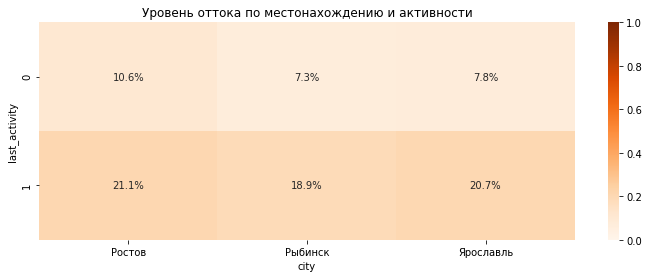

In [92]:
data_gr1_lc = group_1.pivot_table(index='last_activity', columns='city', values='churn', aggfunc='mean')
plt.figure(figsize=(12, 4))
sns.heatmap(data_gr1_lc, cmap='Oranges', annot=True, fmt='.1%',vmin=0, vmax=1)
plt.title('Уровень оттока по местонахождению и активности')
plt.show()

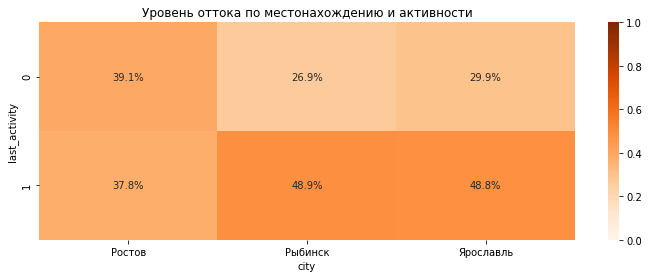

In [93]:
data_gr2_lc = group_2.pivot_table(index='last_activity', columns='city', values='churn', aggfunc='mean')
plt.figure(figsize=(12, 4))
sns.heatmap(data_gr2_lc, cmap='Oranges', annot=True, fmt='.1%',vmin=0, vmax=1)
plt.title('Уровень оттока по местонахождению и активности')
plt.show()

Видим, что неактивные клиенты в меньшей степени являются отточными, чем активные.

Также видим, что процент оттока ниже среди клиентов, которые используют 1-2 продукта.

3. Наличие кредитной карты

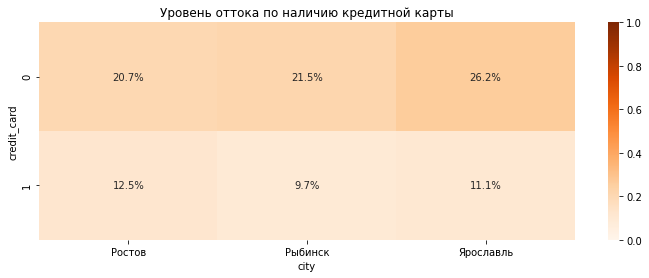

In [94]:
data_gr1_сc = group_1.pivot_table(index='credit_card', columns='city', values='churn', aggfunc='mean')
plt.figure(figsize=(12, 4))
sns.heatmap(data_gr1_сc, cmap='Oranges', annot=True, fmt='.1%',vmin=0, vmax=1)
plt.title('Уровень оттока по наличию кредитной карты')
plt.show()

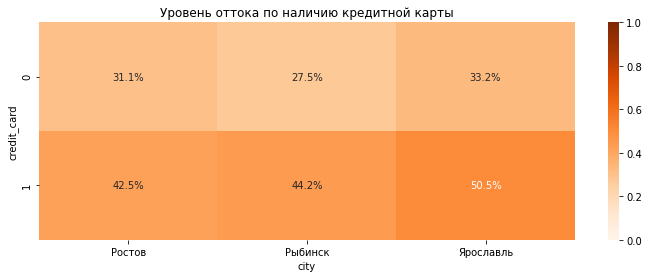

In [95]:
data_gr2_сc = group_2.pivot_table(index='credit_card', columns='city', values='churn', aggfunc='mean')
plt.figure(figsize=(12, 4))
sns.heatmap(data_gr2_сc, cmap='Oranges', annot=True, fmt='.1%',vmin=0, vmax=1)
plt.title('Уровень оттока по наличию кредитной карты')
plt.show()

Среди клиентов, которые используют 1-2 продукта, уровень оттока ниже по тем клиентам, которые имеют кредитную карту.

Среди клиентов, которые используют от 2х продуктов, наоборот - уровень оттока ниже по тем, кто не имеет кредитнуюи карту.

В целом тенденция по тому, что клиенты, использующие больше двух продуктов, имеют более выскокий процент отточности, сохраняется.

4. Балл собственности

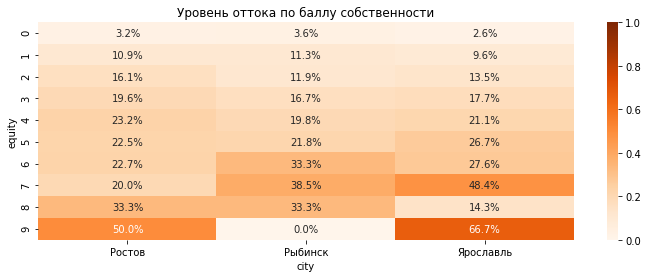

In [96]:
data_gr1_eq = group_1.pivot_table(index='equity', columns='city', values='churn', aggfunc='mean')
plt.figure(figsize=(12, 4))
sns.heatmap(data_gr1_eq, cmap='Oranges', annot=True, fmt='.1%',vmin=0, vmax=1)
plt.title('Уровень оттока по баллу собственности')
plt.show()

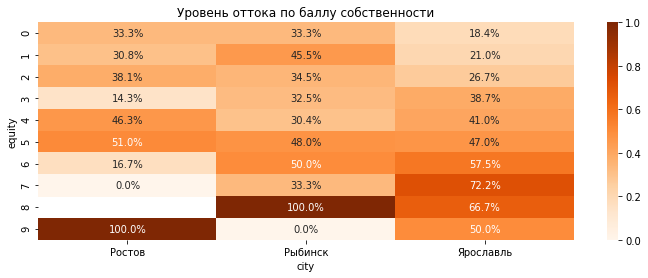

In [97]:
data_gr2_eq = group_2.pivot_table(index='equity', columns='city', values='churn', aggfunc='mean')
plt.figure(figsize=(12, 4))
sns.heatmap(data_gr2_eq, cmap='Oranges', annot=True, fmt='.1%',vmin=0, vmax=1)
plt.title('Уровень оттока по баллу собственности')
plt.show()

Видим, что в первой группе клиентов с использованием продуктов в количестве 1-2 прослеживается закономерность, что, чем выше балл собственности, тем выше уровень оттока.

Во второй группе такая закономерность есть только среди клиентов Ярославля.

По клиентам Ростов и Рыбинска процент оттока исходя из балла собственности различается.

1. Клиенты с баллом скоринга от 850 до 900 и одним продуктом

In [98]:
scr = data.query('score > 850 and score < 900 and products == 1')
scr.describe().T

count           mean            std       min          25%  \
user_id         756.0  171886.244709   33807.168856  94590.00  142243.7500   
score           756.0     882.208995      13.497362    851.00     874.0000   
age             756.0      41.879630      12.291064     18.00      33.0000   
equity          756.0       1.644180       2.098654      0.00       0.0000   
balance         329.0  655150.586991  539626.185631   8373.69  338694.7000   
products        756.0       1.000000       0.000000      1.00       1.0000   
credit_card     756.0       0.800265       0.400066      0.00       1.0000   
last_activity   756.0       0.498677       0.500329      0.00       0.0000   
est_salary      756.0  142927.203558   87012.702886   8587.79   88101.1925   
churn           756.0       0.097884       0.297354      0.00       0.0000   
gender_Ж        756.0       0.456349       0.498421      0.00       0.0000   
gender_М        756.0       0.543651       0.498421      0.00       0.0000   
city_Ростов     756.0       0.150794       0.358085      0.00       0.0000   
city_Рыбинск    756.0       0.288360       0.453299      0.00       0.0000   
city_Ярославль  756.0       0.560847       0.496612      0.00       0.0000   

                      50%          75%         max  
user_id         172309.50  202405.0000   229054.00  
score              885.50     893.0000      899.00  
age                 39.00      49.0000       84.00  
equity               0.00       4.0000        8.00  
balance         500334.97  869386.5800  5438612.25  
products             1.00       1.0000        1.00  
credit_card          1.00       1.0000        1.00  
last_activity        0.00       1.0000        1.00  
est_salary      130897.10  180890.2725   993153.67  
churn                0.00       0.0000        1.00  
gender_Ж             0.00       1.0000        1.00  
gender_М             1.00       1.0000        1.00  
city_Ростов          0.00       0.0000        1.00  
city_Рыбинск         0.00       1.0000        1.00  
city_Ярославль       1.00       1.0000        1.00

Пол и возраст

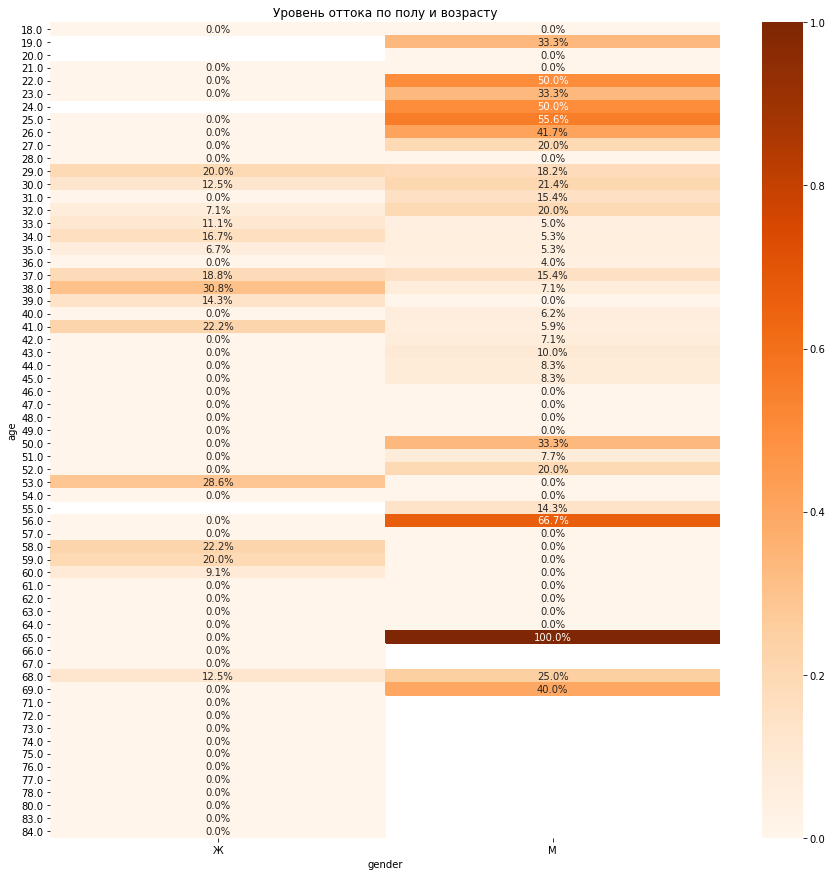

In [99]:
data_scr = scr.pivot_table(index='age', columns='gender', values='churn', aggfunc='mean')
plt.figure(figsize=(15, 15))
sns.heatmap(data_scr, cmap='Oranges', annot=True, fmt='.1%',vmin=0, vmax=1)
plt.title('Уровень оттока по полу и возрасту')
plt.show()

Среди клиентов в выбранном сегменте в зоне риска находятся мужчины от 19 до 26 лет, а также 50, 56 и от 65 лет.

Ниже всего - среди женщин практически любого возраста, кроме 38,41,53,58,59 лет.
Очень большой разброс среди возраста женщин с минимальным % оттока.

Кредитная карта

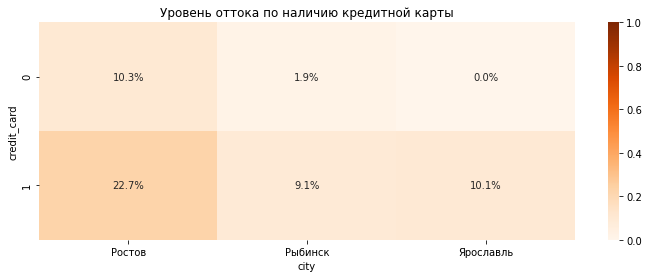

In [100]:
data_scr_сc = scr.pivot_table(index='credit_card', columns='city', values='churn', aggfunc='mean')
plt.figure(figsize=(12, 4))
sns.heatmap(data_scr_сc, cmap='Oranges', annot=True, fmt='.1%',vmin=0, vmax=1)
plt.title('Уровень оттока по наличию кредитной карты')
plt.show()

Выше всего показатель оттока среди клиентов с кредитной картой в Ростове.
По всем другим категориям показатель оттока очень хороший.


Активность клиентов

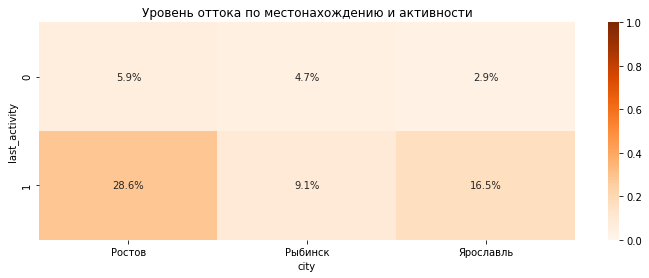

In [101]:
data_scr_lc = scr.pivot_table(index='last_activity', columns='city', values='churn', aggfunc='mean')
plt.figure(figsize=(12, 4))
sns.heatmap(data_scr_lc, cmap='Oranges', annot=True, fmt='.1%',vmin=0, vmax=1)
plt.title('Уровень оттока по местонахождению и активности')
plt.show()

Видим, что активные клиенты чаще всего попадают в категорию оттока в городе Ростове.

Итак, можем сказать, что в сегменте по клиентам с баллом скоринга от 850 до 900 и с использованием одного продукта, где ранее был заметен отток ниже среднебанковского, видим, что бОльшая часть клиентов в категории оттока находится в Ростове и относится к мужскому полу.

Лояльный клиент - это клиент, как правило, женского пола из Рыбинска или Ярославля (как с кредитной картой, так и без)

2. Клиенты категории от 50 до 60 лет

In [102]:
age = data.query('age > 50 and age < 60')
age.describe().T

count          mean           std      min          25%  \
user_id         1410.0  1.735131e+05  3.370690e+04  96267.0  143603.0000   
score           1410.0  8.477766e+02  6.499119e+01    648.0     801.0000   
age             1410.0  5.491135e+01  2.568566e+00     51.0      53.0000   
equity          1410.0  2.730496e+00  1.961950e+00      0.0       1.0000   
balance         1119.0  1.030903e+06  2.510049e+06      6.0  364246.8400   
products        1410.0  1.929078e+00  7.834827e-01      1.0       1.0000   
credit_card     1410.0  5.957447e-01  4.909215e-01      0.0       0.0000   
last_activity   1410.0  5.156028e-01  4.999338e-01      0.0       0.0000   
est_salary      1410.0  1.381892e+05  1.399310e+05   7571.8   71956.2225   
churn           1410.0  2.808511e-01  4.495743e-01      0.0       0.0000   
gender_Ж        1410.0  5.602837e-01  4.965287e-01      0.0       0.0000   
gender_М        1410.0  4.397163e-01  4.965287e-01      0.0       0.0000   
city_Ростов     1410.0  1.546099e-01  3.616607e-01      0.0       0.0000   
city_Рыбинск    1410.0  3.148936e-01  4.646383e-01      0.0       0.0000   
city_Ярославль  1410.0  5.304965e-01  4.992462e-01      0.0       0.0000   

                      50%          75%          max  
user_id         175163.00   202175.000    229058.00  
score              852.00      899.000       992.00  
age                 55.00       57.000        59.00  
equity               3.00        4.000         9.00  
balance         647123.33  1170977.595  64866210.15  
products             2.00        2.000         5.00  
credit_card          1.00        1.000         1.00  
last_activity        1.00        1.000         1.00  
est_salary      106760.51   155388.545   1261408.41  
churn                0.00        1.000         1.00  
gender_Ж             1.00        1.000         1.00  
gender_М             0.00        1.000         1.00  
city_Ростов          0.00        0.000         1.00  
city_Рыбинск         0.00        1.000         1.00  
city_Ярославль       1.00        1.000         1.00

Пол и возраст

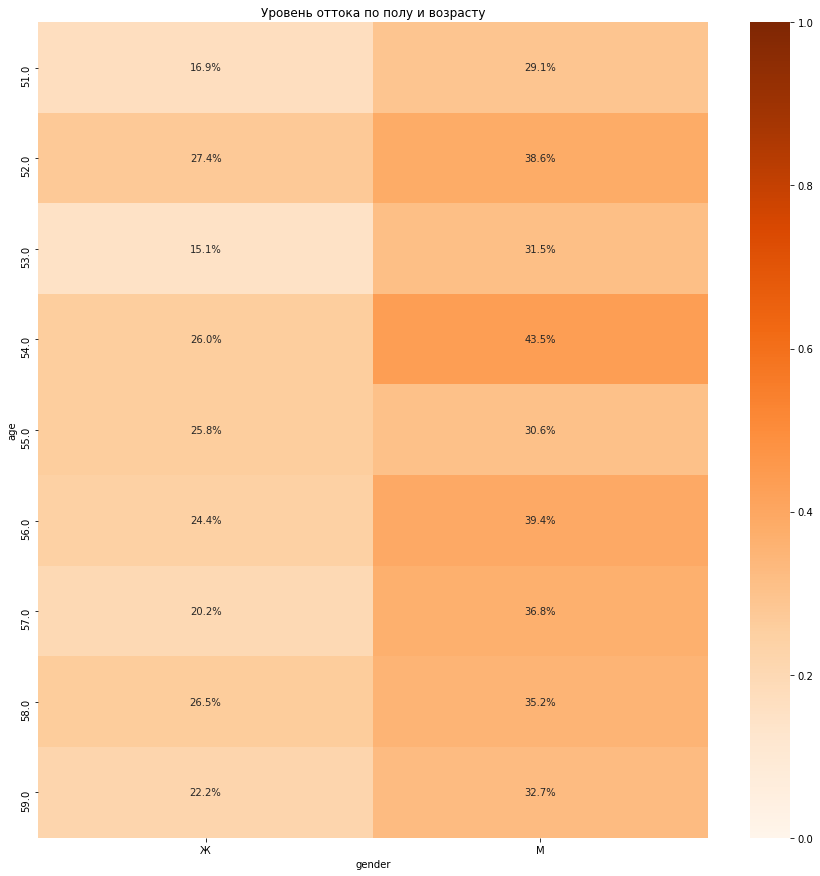

In [103]:
data_age = age.pivot_table(index='age', columns='gender', values='churn', aggfunc='mean')
plt.figure(figsize=(15, 15))
sns.heatmap(data_age, cmap='Oranges', annot=True, fmt='.1%',vmin=0, vmax=1)
plt.title('Уровень оттока по полу и возрасту')
plt.show()

Видим, что уровень оттока среди мужчин данной категории сильно завышен, но и у женщин он также выше нормы.

Самый пик и среди мужчин, и среди женщин приходится на 52 и 54 года.

Кредитная карта

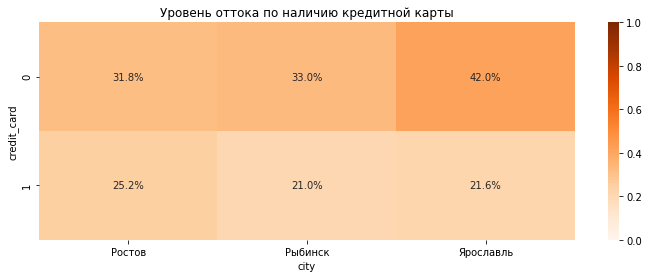

In [104]:
data_age_сc = age.pivot_table(index='credit_card', columns='city', values='churn', aggfunc='mean')
plt.figure(figsize=(12, 4))
sns.heatmap(data_age_сc, cmap='Oranges', annot=True, fmt='.1%',vmin=0, vmax=1)
plt.title('Уровень оттока по наличию кредитной карты')
plt.show()

Выше всего показатель оттока у клиентов без кредитной карты из Ярославля.

Активность клиентов

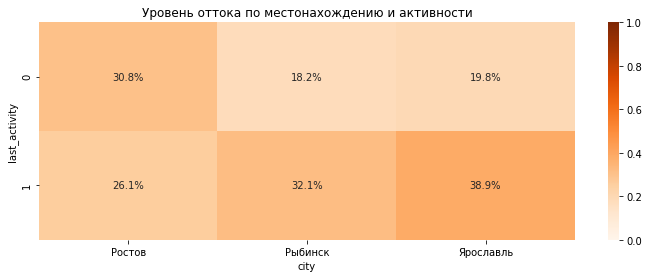

In [105]:
data_age_lc = age.pivot_table(index='last_activity', columns='city', values='churn', aggfunc='mean')
plt.figure(figsize=(12, 4))
sns.heatmap(data_age_lc, cmap='Oranges', annot=True, fmt='.1%',vmin=0, vmax=1)
plt.title('Уровень оттока по местонахождению и активности')
plt.show()

Самый высокий отток активных клиентов среди жителей Ярославля, но также из нормы выбиваются клиенты без активностей из Ростова.

Итак, мы видим следующий портрет клиента с признаками высокого оттока из данной категории:

1. Мужчина 52-54 лет.
2. Без кредитной карты, из Ярославля.
3. С активностью из Ярославля или без активности из Ростова.

3. Баланс свыше 1,1 млн.

In [106]:
blnc = data.query('balance > 1100000')
blnc.describe().T

count          mean           std         min          25%  \
user_id         1614.0  1.732844e+05  3.528080e+04    96267.00   143765.500   
score           1614.0  8.808191e+02  5.481129e+01      727.00      843.000   
age             1614.0  4.569579e+01  1.139908e+01       23.00       37.000   
equity          1614.0  4.188352e+00  1.041823e+00        0.00        4.000   
balance         1614.0  2.197873e+06  4.006146e+06  1100064.92  1245543.395   
products        1614.0  2.374845e+00  8.575614e-01        1.00        2.000   
credit_card     1614.0  4.981413e-01  5.001515e-01        0.00        0.000   
last_activity   1614.0  5.241636e-01  4.995706e-01        0.00        0.000   
est_salary      1614.0  1.919703e+05  1.737040e+05    14869.95   105202.300   
churn           1614.0  4.107807e-01  4.921280e-01        0.00        0.000   
gender_Ж        1614.0  4.659232e-01  4.989920e-01        0.00        0.000   
gender_М        1614.0  5.340768e-01  4.989920e-01        0.00        0.000   
city_Ростов     1614.0  1.307311e-01  3.372105e-01        0.00        0.000   
city_Рыбинск    1614.0  2.503098e-01  4.333257e-01        0.00        0.000   
city_Ярославль  1614.0  6.189591e-01  4.857931e-01        0.00        0.000   

                        50%          75%           max  
user_id          175211.000   203970.250  2.290580e+05  
score               890.000      921.000  1.000000e+03  
age                  43.000       55.000  8.400000e+01  
equity                4.000        5.000  9.000000e+00  
balance         1436445.205  2059736.325  1.191136e+08  
products              2.000        3.000  5.000000e+00  
credit_card           0.000        1.000  1.000000e+00  
last_activity         1.000        1.000  1.000000e+00  
est_salary       149455.620   211340.725  1.395064e+06  
churn                 0.000        1.000  1.000000e+00  
gender_Ж              0.000        1.000  1.000000e+00  
gender_М              1.000        1.000  1.000000e+00  
city_Ростов           0.000        0.000  1.000000e+00  
city_Рыбинск          0.000        0.750  1.000000e+00  
city_Ярославль        1.000        1.000  1.000000e+00

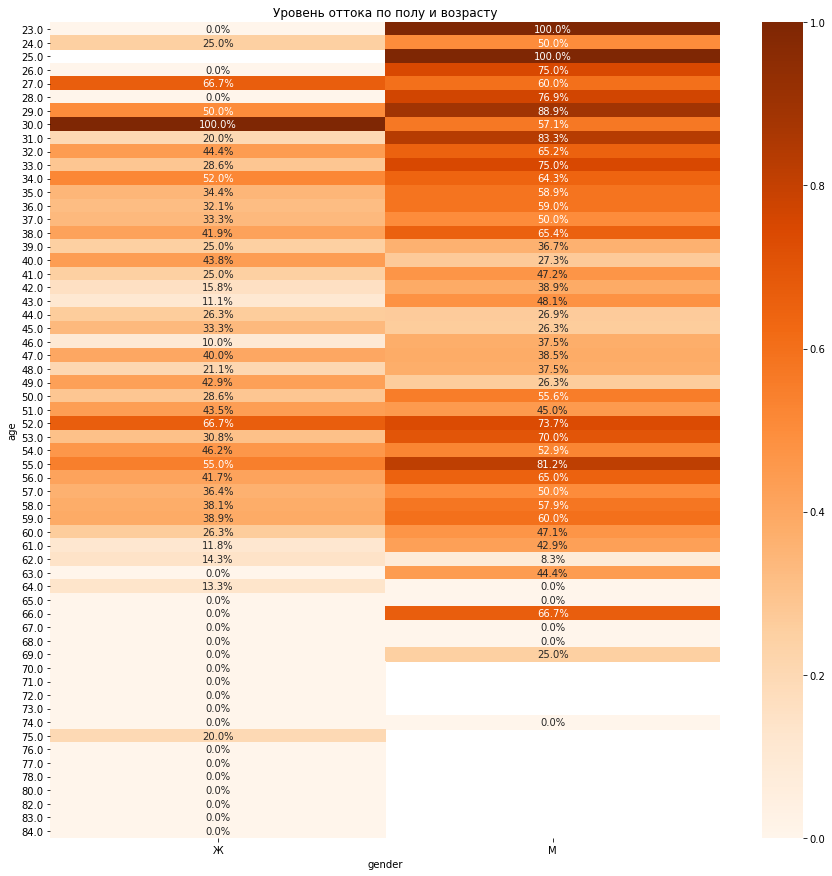

In [107]:
data_blnc = blnc.pivot_table(index='age', columns='gender', values='churn', aggfunc='mean')
plt.figure(figsize=(15, 15))
sns.heatmap(data_blnc, cmap='Oranges', annot=True, fmt='.1%',vmin=0, vmax=1)
plt.title('Уровень оттока по полу и возрасту')
plt.show()

Самый высокий процент оттока в данной категории среди мужчин практически всех возрастов, но в большей степени это промежуток с 23 до 43 лет и с 50 до 62 лет.

Среди женщин процент оттока также является высоким и выше нормы, но ниже, чем у мужчин. Самый пик среди женщин приходися на возраст с 27 до 35 лет и с 50 до 60 лет.

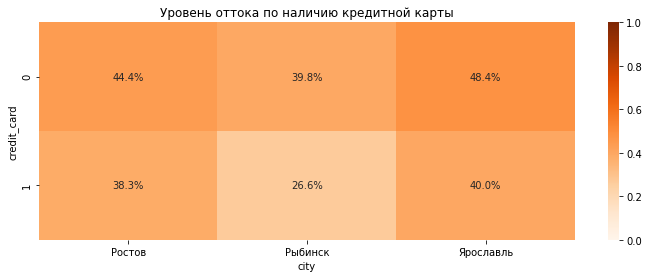

In [108]:
data_blnc_сc = blnc.pivot_table(index='credit_card', columns='city', values='churn', aggfunc='mean')
plt.figure(figsize=(12, 4))
sns.heatmap(data_blnc_сc, cmap='Oranges', annot=True, fmt='.1%',vmin=0, vmax=1)
plt.title('Уровень оттока по наличию кредитной карты')
plt.show()

В целом в данной категории высокий процент оттока, но выше всего среди клиентов без кредитной карты из Ярославля и Ростова

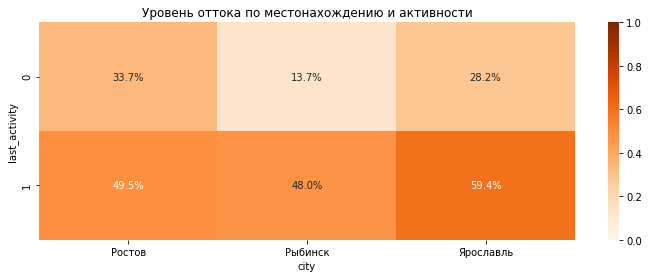

In [109]:
data_blnc_lc = blnc.pivot_table(index='last_activity', columns='city', values='churn', aggfunc='mean')
plt.figure(figsize=(12, 4))
sns.heatmap(data_blnc_lc, cmap='Oranges', annot=True, fmt='.1%',vmin=0, vmax=1)
plt.title('Уровень оттока по местонахождению и активности')
plt.show()

Выше всего процент оттока в данной категории среди клиентов с активностью и проживающих в Ярославле.

# Формирование портрета клиентов

Признаки рискового клиента: 
    
- Местонахождение: Ярославль и Ростов
- Пол: Мужчины - среди мужчин процент оттока выше, чем среди женщин
- Количество используемых продуктов: больше 2
- Возраст: Средний и молодой - клиенты среднего возрата от 50 до 60 лет и молодого возраста от 26 до 35 лет.
- Балл собственности: Высокий - чем выше балл собственности, тем больше склонность ухода в отток
- Кредитная карта: Клиенты без кредитной карты
- Активность клиента: Активные
    
Признаки лояльного клиента:
    
- Местонахождение: Рыбинск
- Пол: Женщины - они менее склонны попадать в отток
- Количество используемых продуктов: 1-2
- Возраст: 18-25, 36-45 и больше 60
- Балл собственности: от 0 до 3 - чем ниже балл собственности, тем ниже процент оттока клиентов
- Кредитная карта: Клиенты, использующие кредитную карту
- Активность клиента: Неактивные

В разрезе сегментов:

- Клиенты с баллом скоринга от 850 до 900 и использующие один продукт - клиенты с заниженным показателем оттока, из них:

       - женщины в среднем имеют значительно ниже показатель оттока, чем мужчины
       - минимальный процент оттока по клиентам без кредитной карты
       - минимальный процент оттока по клиентам без активности и достаточно высокий по активным клиентам из Ростова
       
- Клиенты в возрасте от 50 до 60 лет - клиенты с повышенным показателем оттока, из них:

        - более подвержены оттоку мужчины, чем женщины (преимущетвенно 52, 54 года)
        - клиенты без кредитной карты из Ярославля имеют процент оттока выше остальных
        - клиенты с активностью из Ярославля и без активности из Ростова имеют процент оттока выше остальных
        
- Клиенты с балансом выше 1,1 млн., из них:

        - мужчины практически всех возрастов имеют очень высокий уровень оттока
        - у женщин уровень оттока также выше среднего, но значительно ниже, чем у мужчин
        - высокий процент оттока по клиентам без кредитной карты, выше всего - в Ярославле
        - высокий процент оттока по активным клиентам, выше всего - по клиентам из Ярославля


# Вывод

На данном этапе мы более подробно в разрезе групп рассмотрели влияние показателей на отток и сформировали портреты клиентов, на основании чего можем сделать вывод:

1. Количество продуктов у пользователя напрямую связано с процентом оттока
2. Имеется явная взаимосвязь между процентом оттока и активностью клиента, а также использованием клиентом кредитной карты
3. Процент оттока выше в городах Ярославль и Ростов
4. Процент оттока выше среди клиентов мужского пола

# Выводы и рекомендации

1. Выводы:
    
    - В зависимости от возраста клиент использует разное количество продуктов (гипотеза 1)
    - Доход клиента не влияет на показатель оттока (гипотеза 2)
    - Портрет рискового клиента:
        - Местонахождение: Ярославль и Ростов
        - Пол: Мужчины - среди мужчин процент оттока выше, чем среди женщин
        - Количество используемых продуктов: больше 2
        - Возраст: Средний - клиенты среднего возрата от 50 до 60 лет
        - Балл собственности: Высокий - чем выше балл собственности, тем больше склонность ухода в отток
        - Кредитная карта: Клиенты без кредитной карты
        - Активность клиента: Активные
        
2. Рекомендации:

    - Сформировать программу лояльности для клиентов в возрасте от 50-60 лет, например, для пенсионеров. Подумать над более выгодными условиями для данной категории клиента.
    - Провести анализ конкурентов и изменить условия приобретения и использования кредитной карты, сделать их более выгодными - клиенты с кредитной картой более лояльны, необходимо привлечь к ее использованию как можно больше клиентов.
    - Провести ряд акций и мероприятий по удержанию для клиентов Ярославля


3. Презентация: https://disk.yandex.com.am/i/xahdrBDz_IM4GA